In [2]:
import pandas as pd
import geopandas as gpd
import os
import zipfile
from sklearn.cluster import KMeans
from matplotlib import cm
from descartes import PolygonPatch
import scipy.cluster as scp
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster as scp
import pandas as pd
from pandas.io.common import ZipFile

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [106]:
#census tracts age gender
census00 = pd.read_csv(os.getenv("PUIDATA") + "/DEC_00_SF1_DP1.csv")
census10 = pd.read_csv(os.getenv("PUIDATA") + "/DEC_10_SF1_SF1DP1.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,171,173,174,175,176,177,178,179,180,181,183,185,186,187,188,189,190,191,193) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/inte

In [107]:
census10

GEO.id      GEO.id2  \
0                       Id          Id2   
1     1400000US36001000100  36001000100   
2     1400000US36001000200  36001000200   
3     1400000US36001000300  36001000300   
4     1400000US36001000401  36001000401   
5     1400000US36001000403  36001000403   
6     1400000US36001000404  36001000404   
7     1400000US36001000501  36001000501   
8     1400000US36001000502  36001000502   
9     1400000US36001000600  36001000600   
10    1400000US36001000700  36001000700   
11    1400000US36001000800  36001000800   
12    1400000US36001001100  36001001100   
13    1400000US36001001400  36001001400   
14    1400000US36001001500  36001001500   
15    1400000US36001001600  36001001600   
16    1400000US36001001700  36001001700   
17    1400000US36001001801  36001001801   
18    1400000US36001001802  36001001802   
19    1400000US36001001901  36001001901   
20    1400000US36001001902  36001001902   
21    1400000US36001002000  36001002000   
22    1400000US36001002100  36001002100   
23    1400000US36001002200  36001002200   
24    1400000US36001002300  36001002300   
25    1400000US36001002500  36001002500   
26    1400000US36001002600  36001002600   
27    1400000US36001012700  36001012700   
28    1400000US36001012800  36001012800   
29    1400000US36001012900  36001012900   
...                    ...          ...   
4890  1400000US36119014809  36119014809   
4891  1400000US36119014810  36119014810   
4892  1400000US36119014811  36119014811   
4893  1400000US36119014901  36119014901   
4894  1400000US36119014903  36119014903   
4895  1400000US36119014907  36119014907   
4896  1400000US36119014908  36119014908   
4897  1400000US36119014909  36119014909   
4898  1400000US36119015000  36119015000   
4899  1400000US36119981000  36119981000   
4900  1400000US36119982000  36119982000   
4901  1400000US36119983000  36119983000   
4902  1400000US36119984000  36119984000   
4903  1400000US36119985000  36119985000   
4904  1400000US36121970100  36121970100   
4905  1400000US36121970200  36121970200   
4906  1400000US36121970300  36121970300   
4907  1400000US36121970400  36121970400   
4908  1400000US36121970500  36121970500   
4909  1400000US36121970600  36121970600   
4910  1400000US36121970700  36121970700   
4911  1400000US36121970800  36121970800   
4912  1400000US36121970900  36121970900   
4913  1400000US36121971000  36121971000   
4914  1400000US36121971100  36121971100   
4915  1400000US36123150100  36123150100   
4916  1400000US36123150200  36123150200   
4917  1400000US36123150300  36123150300   
4918  1400000US36123150400  36123150400   
4919  1400000US36123150500  36123150500   

                                      GEO.display-label  \
0                                             Geography   
1               Census Tract 1, Albany County, New York   
2               Census Tract 2, Albany County, New York   
3               Census Tract 3, Albany County, New York   
4            Census Tract 4.01, Albany County, New York   
5            Census Tract 4.03, Albany County, New York   
6            Census Tract 4.04, Albany County, New York   
7            Census Tract 5.01, Albany County, New York   
8            Census Tract 5.02, Albany County, New York   
9               Census Tract 6, Albany County, New York   
10              Census Tract 7, Albany County, New York   
11              Census Tract 8, Albany County, New York   
12             Census Tract 11, Albany County, New York   
13             Census Tract 14, Albany County, New York   
14             Census Tract 15, Albany County, New York   
15             Census Tract 16, Albany County, New York   
16             Census Tract 17, Albany County, New York   
17          Census Tract 18.01, Albany County, New York   
18          Census Tract 18.02, Albany County, New York   
19          Census Tract 19.01, Albany County, New York   
20          Census Tract 19.02, Albany County, New York   
21             Census Tract 20, Albany County, New York

In [108]:
census00

GEO.id      GEO.id2  \
0                       Id          Id2   
1     1400000US36001000100  36001000100   
2     1400000US36001000200  36001000200   
3     1400000US36001000300  36001000300   
4     1400000US36001000401  36001000401   
5     1400000US36001000403  36001000403   
6     1400000US36001000404  36001000404   
7     1400000US36001000501  36001000501   
8     1400000US36001000502  36001000502   
9     1400000US36001000600  36001000600   
10    1400000US36001000700  36001000700   
11    1400000US36001000800  36001000800   
12    1400000US36001001100  36001001100   
13    1400000US36001001400  36001001400   
14    1400000US36001001500  36001001500   
15    1400000US36001001600  36001001600   
16    1400000US36001001700  36001001700   
17    1400000US36001001801  36001001801   
18    1400000US36001001802  36001001802   
19    1400000US36001001901  36001001901   
20    1400000US36001001902  36001001902   
21    1400000US36001002000  36001002000   
22    1400000US36001002100  36001002100   
23    1400000US36001002200  36001002200   
24    1400000US36001002300  36001002300   
25    1400000US36001002500  36001002500   
26    1400000US36001002600  36001002600   
27    1400000US36001012700  36001012700   
28    1400000US36001012800  36001012800   
29    1400000US36001012900  36001012900   
...                    ...          ...   
4878  1400000US36119014703  36119014703   
4879  1400000US36119014704  36119014704   
4880  1400000US36119014804  36119014804   
4881  1400000US36119014805  36119014805   
4882  1400000US36119014806  36119014806   
4883  1400000US36119014807  36119014807   
4884  1400000US36119014808  36119014808   
4885  1400000US36119014809  36119014809   
4886  1400000US36119014902  36119014902   
4887  1400000US36119014905  36119014905   
4888  1400000US36119014906  36119014906   
4889  1400000US36119014907  36119014907   
4890  1400000US36119014908  36119014908   
4891  1400000US36119015000  36119015000   
4892  1400000US36121990100  36121990100   
4893  1400000US36121990200  36121990200   
4894  1400000US36121990300  36121990300   
4895  1400000US36121990400  36121990400   
4896  1400000US36121990500  36121990500   
4897  1400000US36121990600  36121990600   
4898  1400000US36121990700  36121990700   
4899  1400000US36121990800  36121990800   
4900  1400000US36121990900  36121990900   
4901  1400000US36121991000  36121991000   
4902  1400000US36121991100  36121991100   
4903  1400000US36123990100  36123990100   
4904  1400000US36123990200  36123990200   
4905  1400000US36123990300  36123990300   
4906  1400000US36123990400  36123990400   
4907  1400000US36123990500  36123990500   

                                      GEO.display-label  \
0                                             Geography   
1               Census Tract 1, Albany County, New York   
2               Census Tract 2, Albany County, New York   
3               Census Tract 3, Albany County, New York   
4            Census Tract 4.01, Albany County, New York   
5            Census Tract 4.03, Albany County, New York   
6            Census Tract 4.04, Albany County, New York   
7            Census Tract 5.01, Albany County, New York   
8            Census Tract 5.02, Albany County, New York   
9               Census Tract 6, Albany County, New York   
10              Census Tract 7, Albany County, New York   
11              Census Tract 8, Albany County, New York   
12             Census Tract 11, Albany County, New York   
13             Census Tract 14, Albany County, New York   
14             Census Tract 15, Albany County, New York   
15             Census Tract 16, Albany County, New York   
16             Census Tract 17, Albany County, New York   
17          Census Tract 18.01, Albany County, New York   
18          Census Tract 18.02, Albany County, New York   
19          Census Tract 19.01, Albany County, New York   
20          Census Tract 19.02, Albany County, New York   
21             Census Tract 20, Albany County, New York

In [109]:
#census tracts shape file
ct = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/2010 Census Tracts.geojson")
ct.shape

(2166, 12)

In [110]:
#fix the county codes
countyID = {'Bronx':'005',
           'Manhattan':'061',
           'Staten Island':'085',
           'Brooklyn':'047',
           'Queens':'081'}
ct['allcodes'] = list(zip(ct.boro_name, ct.ct_2010))
# Create Point Geometry for based on lonlat column
#ct['GEOID'] = ct.allcodes.map(lambda x:int("36%03d%06d"%(int(x[0]), int(x[1]))))
#type(ct['GEOID'].values[0]), type(demo['GEOID'].values[0])
ct['GEOID']  = ct[['allcodes']].applymap(lambda x: 
                                         int("36%03d%06d"%(int(countyID[x[0]]),int(x[1]))))

In [111]:
census10['GEOID'] = census10['GEO.id'][1:].map(lambda x:int(x.replace('1400000US', '')))
census00['GEOID'] = census00['GEO.id'][1:].map(lambda x:int(x.replace('1400000US', '')))

In [112]:
selected_census00 = ["GEO.id", "GEOID", "HC01_VC01", "HC01_VC18", "HC01_VC28"]
#, "HC02_VC29", 
#                    "HC02_VC66", "HC02_VC68", "HC01_VC90", "HC02_VC94", 
#                    "HC02_VC101"]

census00[selected_census00].iloc[0]


GEO.id                                                      Id
GEOID                                                      NaN
HC01_VC01                             Number; Total population
HC01_VC18    Number; Total population - SEX AND AGE - Media...
HC01_VC28           Number; Total population - RACE - One race
Name: 0, dtype: object

In [113]:
selected_census10 = ["GEO.id", "GEOID", "HD01_S001", "HD01_S020", "HD01_S077"]
#, "HC02_VC29"]
#, 
#                    "HC02_VC55"]#, "HC02_VC66"]#, "HC02_VC68", "HC01_VC90", 
#"HC02_VC94", "HC02_VC101"]
census10[selected_census10].iloc[0]


GEO.id                                                      Id
GEOID                                                      NaN
HD01_S001               Number; SEX AND AGE - Total population
HD01_S020    Number; SEX AND AGE - Total population - Media...
HD01_S077           Number; RACE - Total population - One Race
Name: 0, dtype: object

In [114]:
f = os.getenv("PUIDATA") + "/DEC_00_SF3_DP3.zip"

zf = zipfile.ZipFile(f)
income00 = pd.read_csv(zf.open(f.replace('.zip','_with_ann.csv').\
                            replace(os.getenv("PUIDATA") + '/', '')))
meta =  (pd.read_csv(zf.open(f.replace('.zip','_metadata.csv').\
                            replace(os.getenv("PUIDATA") + '/', ''))))
income00


GEO.id      GEO.id2  \
0     1400000US36001000100  36001000100   
1     1400000US36001000200  36001000200   
2     1400000US36001000300  36001000300   
3     1400000US36001000401  36001000401   
4     1400000US36001000403  36001000403   
5     1400000US36001000404  36001000404   
6     1400000US36001000501  36001000501   
7     1400000US36001000502  36001000502   
8     1400000US36001000600  36001000600   
9     1400000US36001000700  36001000700   
10    1400000US36001000800  36001000800   
11    1400000US36001001100  36001001100   
12    1400000US36001001400  36001001400   
13    1400000US36001001500  36001001500   
14    1400000US36001001600  36001001600   
15    1400000US36001001700  36001001700   
16    1400000US36001001801  36001001801   
17    1400000US36001001802  36001001802   
18    1400000US36001001901  36001001901   
19    1400000US36001001902  36001001902   
20    1400000US36001002000  36001002000   
21    1400000US36001002100  36001002100   
22    1400000US36001002200  36001002200   
23    1400000US36001002300  36001002300   
24    1400000US36001002500  36001002500   
25    1400000US36001002600  36001002600   
26    1400000US36001012700  36001012700   
27    1400000US36001012800  36001012800   
28    1400000US36001012900  36001012900   
29    1400000US36001013000  36001013000   
...                    ...          ...   
4877  1400000US36119014703  36119014703   
4878  1400000US36119014704  36119014704   
4879  1400000US36119014804  36119014804   
4880  1400000US36119014805  36119014805   
4881  1400000US36119014806  36119014806   
4882  1400000US36119014807  36119014807   
4883  1400000US36119014808  36119014808   
4884  1400000US36119014809  36119014809   
4885  1400000US36119014902  36119014902   
4886  1400000US36119014905  36119014905   
4887  1400000US36119014906  36119014906   
4888  1400000US36119014907  36119014907   
4889  1400000US36119014908  36119014908   
4890  1400000US36119015000  36119015000   
4891  1400000US36121990100  36121990100   
4892  1400000US36121990200  36121990200   
4893  1400000US36121990300  36121990300   
4894  1400000US36121990400  36121990400   
4895  1400000US36121990500  36121990500   
4896  1400000US36121990600  36121990600   
4897  1400000US36121990700  36121990700   
4898  1400000US36121990800  36121990800   
4899  1400000US36121990900  36121990900   
4900  1400000US36121991000  36121991000   
4901  1400000US36121991100  36121991100   
4902  1400000US36123990100  36123990100   
4903  1400000US36123990200  36123990200   
4904  1400000US36123990300  36123990300   
4905  1400000US36123990400  36123990400   
4906  1400000US36123990500  36123990500   

                                      GEO.display-label  HC01_VC02 HC02_VC02  \
0               Census Tract 1, Albany County, New York       1293     100.0   
1               Census Tract 2, Albany County, New York       3787     100.0   
2               Census Tract 3, Albany County, New York       4234     100.0   
3            Census Tract 4.01, Albany County, New York       1932     100.0   
4            Census Tract 4.03, Albany County, New York       3808     100.0   
5            Census Tract 4.04, Albany County, New York       4913     100.0   
6            Census Tract 5.01, Albany County, New York       2645     100.0   
7            Census Tract 5.02, Albany County, New York       3254     100.0   
8               Census Tract 6, Albany County, New York       2628     100.0   
9               Census Tract 7, Albany County, New York       3059     100.0   
10              Census Tract 8, Albany County, New York       1752     100.0   
11             Census Tract 11, Albany County, New York       1048     100.0   
12             Census Tract 14, Albany County, New York       3409     100.0   
13             Census Tract 15, Albany County, New York       3967     100.0   
14             Census Tract 16, Albany County, New York       3531     100.0   
15             Census Tract 17, Albany County, New York       3382     10

In [115]:
f = os.getenv("PUIDATA") + "/ACS_10_5YR_S1901.zip"

zf = zipfile.ZipFile(f)
income10 = pd.read_csv(zf.open(f.replace('.zip','_with_ann.csv').\
                            replace(os.getenv("PUIDATA") + '/', '')))
meta =  (pd.read_csv(zf.open(f.replace('.zip','_metadata.csv').\
                            replace(os.getenv("PUIDATA") + '/', ''))))
income10
#print (meta.iloc[94])
#for i,m in enumerate(meta["Id"].values):
#    print (i,m)
meta

GEO.id                                                 Id
0              GEO.id2                                                Id2
1    GEO.display-label                                          Geography
2        HC01_EST_VC01                        Households; Estimate; Total
3        HC01_MOE_VC01                 Households; Margin of Error; Total
4        HC02_EST_VC01                          Families; Estimate; Total
5        HC02_MOE_VC01                   Families; Margin of Error; Total
6        HC03_EST_VC01           Married-couple families; Estimate; Total
7        HC03_MOE_VC01    Married-couple families; Margin of Error; Total
8        HC04_EST_VC01              Nonfamily households; Estimate; Total
9        HC04_MOE_VC01       Nonfamily households; Margin of Error; Total
10       HC01_EST_VC02            Households; Estimate; Less than $10,000
11       HC01_MOE_VC02     Households; Margin of Error; Less than $10,000
12       HC02_EST_VC02              Families; Estimate; Less than $10,000
13       HC02_MOE_VC02       Families; Margin of Error; Less than $10,000
14       HC03_EST_VC02  Married-couple families; Estimate; Less than $...
15       HC03_MOE_VC02  Married-couple families; Margin of Error; Less...
16       HC04_EST_VC02  Nonfamily households; Estimate; Less than $10,000
17       HC04_MOE_VC02  Nonfamily households; Margin of Error; Less th...
18       HC01_EST_VC03           Households; Estimate; $10,000 to $14,999
19       HC01_MOE_VC03    Households; Margin of Error; $10,000 to $14,999
20       HC02_EST_VC03             Families; Estimate; $10,000 to $14,999
21       HC02_MOE_VC03      Families; Margin of Error; $10,000 to $14,999
22       HC03_EST_VC03  Married-couple families; Estimate; $10,000 to ...
23       HC03_MOE_VC03  Married-couple families; Margin of Error; $10,...
24       HC04_EST_VC03  Nonfamily households; Estimate; $10,000 to $14...
25       HC04_MOE_VC03  Nonfamily households; Margin of Error; $10,000...
26       HC01_EST_VC04           Households; Estimate; $15,000 to $24,999
27       HC01_MOE_VC04    Households; Margin of Error; $15,000 to $24,999
28       HC02_EST_VC04             Families; Estimate; $15,000 to $24,999
29       HC02_MOE_VC04      Families; Margin of Error; $15,000 to $24,999
..                 ...                                                ...
100      HC02_EST_VC15          Families; Estimate; Mean income (dollars)
101      HC02_MOE_VC15   Families; Margin of Error; Mean income (dollars)
102      HC03_EST_VC15  Married-couple families; Estimate; Mean income...
103      HC03_MOE_VC15  Married-couple families; Margin of Error; Mean...
104      HC04_EST_VC15  Nonfamily households; Estimate; Mean income (d...
105      HC04_MOE_VC15  Nonfamily households; Margin of Error; Mean in...
106      HC01_EST_VC18  Households; Estimate; PERCENT IMPUTED - Househ...
107      HC01_MOE_VC18  Households; Margin of Error; PERCENT IMPUTED -...
108      HC02_EST_VC18  Families; Estimate; PERCENT IMPUTED - Househol...
109      HC02_MOE_VC18  Families; Margin of Error; PERCENT IMPUTED - H...
110      HC03_EST_VC18  Married-couple families; Estimate; PERCENT IMP...
111      HC03_MOE_VC18  Married-couple families; Margin of Error; PERC...
112      HC04_EST_VC18  Nonfamily households; Estimate; PERCENT IMPUTE...
113      HC04_MOE_VC18  Nonfamily households; Margin of Error; PERCENT...
114      HC01_EST_VC19  Households; Estimate; PERCENT IMPUTED - Family...
115      HC01_MOE_VC19  Households; Margin of Error; PERCENT IMPUTED -...
116      HC02_EST_VC19  Families; Estimate; PERCENT IMPUTED - Family i...
117      HC02_MOE_VC19  Families; Margin of Error; PERCENT IMPUTED - F...
118      HC03_EST_VC19  Married-couple families; Estimate; PERCENT IMP...
119      HC03_MOE_VC19  Married-couple families; Margin of Error; PERC...
120      HC04_EST_VC19  Nonfamily households; Estimate; PERCENT IMPUTE...
121      HC04_MOE_VC19  Nonfamily households; Margin of Error; PERCENT...
122      HC01_EST_VC

In [116]:
#income from americanfactfinder
# = pd.read_csv(os.getenv("PUIDATA") + "/ACS_10_SF4_DP03/ACS_10_SF4_DP03.csv")
selected_income10 = ["GEO.id","HC01_EST_VC01","GEO.display-label"]#"HC01_VC85",]
#income00 = pd.read_csv(os.getenv("PUIDATA") + "/DEC_00_SF4_DP3_with_ann.csv")
selected_income00 = ["GEO.id","HC01_VC53"]

In [117]:
income00[selected_income00].iloc[0], income10[selected_income10].iloc[0]

(GEO.id       1400000US36001000100
 HC01_VC53                     649
 Name: 0, dtype: object,
 GEO.id                                  1400000US36001000100
 HC01_EST_VC01                                            848
 GEO.display-label    Census Tract 1, Albany County, New York
 Name: 0, dtype: object)

In [118]:
incomecensus00 = pd.merge(census00[selected_census00],income00[selected_income00], 
                          on="GEO.id")
incomecensus10 = pd.merge(census10[selected_census10],income10[selected_income10], 
                          on="GEO.id")
incomecensus10

GEO.id         GEOID HD01_S001 HD01_S020 HD01_S077  \
0     1400000US36001000100  3.600100e+10      2139      32.2      2050   
1     1400000US36001000200  3.600100e+10      6046      28.8      5819   
2     1400000US36001000300  3.600100e+10      5888      35.4      5629   
3     1400000US36001000401  3.600100e+10      2227      63.7      2200   
4     1400000US36001000403  3.600100e+10      4415      38.3      4314   
5     1400000US36001000404  3.600100e+10      5203      20.4      5024   
6     1400000US36001000501  3.600100e+10      3412      29.9      3237   
7     1400000US36001000502  3.600100e+10      3448      21.3      3350   
8     1400000US36001000600  3.600100e+10      3676      24.5      3461   
9     1400000US36001000700  3.600100e+10      3821      27.9      3670   
10    1400000US36001000800  3.600100e+10      2393      33.9      2274   
11    1400000US36001001100  3.600100e+10      1169      48.5      1119   
12    1400000US36001001400  3.600100e+10      3560      31.2      3460   
13    1400000US36001001500  3.600100e+10      4606      25.0      4439   
14    1400000US36001001600  3.600100e+10      4273      25.4      4125   
15    1400000US36001001700  3.600100e+10      4021      34.6      3897   
16    1400000US36001001801  3.600100e+10      6579      50.2      6491   
17    1400000US36001001802  3.600100e+10      3816      44.7      3732   
18    1400000US36001001901  3.600100e+10      2607      38.0      2536   
19    1400000US36001001902  3.600100e+10      2581      42.6      2518   
20    1400000US36001002000  3.600100e+10      5771      33.4      5504   
21    1400000US36001002100  3.600100e+10      3773      24.4      3612   
22    1400000US36001002200  3.600100e+10      2344      31.3      2245   
23    1400000US36001002300  3.600100e+10      2051      31.1      1938   
24    1400000US36001002500  3.600100e+10      2872      29.7      2720   
25    1400000US36001002600  3.600100e+10      5165      31.4      4869   
26    1400000US36001012700  3.600101e+10      2342      39.0      2291   
27    1400000US36001012800  3.600101e+10      3836      33.7      3663   
28    1400000US36001012900  3.600101e+10      3445      38.1      3316   
29    1400000US36001013000  3.600101e+10      6545      43.6      6413   
...                    ...           ...       ...       ...       ...   
4889  1400000US36119014809  3.611901e+10      6115      43.2      6012   
4890  1400000US36119014810  3.611901e+10      2086      68.4      2062   
4891  1400000US36119014811  3.611901e+10      5589      41.9      5481   
4892  1400000US36119014901  3.611901e+10      6267        44      6201   
4893  1400000US36119014903  3.611901e+10      4277      64.2      4246   
4894  1400000US36119014907  3.611901e+10      4411      39.2      4329   
4895  1400000US36119014908  3.611901e+10      2886      42.8      2844   
4896  1400000US36119014909  3.611901e+10      2593      53.1      2562   
4897  1400000US36119015000  3.611902e+10      5104      45.8      5029   
4898  1400000US36119981000  3.611998e+10      2234      28.9      2201   
4899  1400000US36119982000  3.611998e+10      1749      39.3      1745   
4900  1400000US36119983000  3.611998e+10      1129      37.9      1127   
4901  1400000US36119984000  3.611998e+10       570      82.9       566   
4902  1400000US36119985000  3.611998e+10      2525      20.5      2394   
4903  1400000US36121970100  3.612197e+10      2673      41.9      2643   
4904  1400000US36121970200  3.612197e+10      7702        38      7664   
4905  1400000US36121970300  3.612197e+10      3359      45.6      3349   
4906  1400000US36121970400  3.612197e+10      3764      43.5      3733   
4907  1400000US36121970500  3.612197e+10      5064      42.1      4992   
4908  1400000US36121970600  3.612197e+10      4616      39.4      4553   
4909  1400000US36121970700  3.612197e+10      2906      42.5      2873   
4910  1400000US36121970800  3.612197e+10      3065      41.4      3041   
4911  1400000US361219709

In [119]:
geocensus00 = ct.merge(incomecensus00, on="GEOID")
geocensus10 = ct.merge(incomecensus10, on="GEOID")
geocensus10 

boro_code boro_ct_2010      boro_name cdeligibil ct_2010  ctlabel  \
0            5      5000900  Staten Island          I  000900        9   
1            5      5007400  Staten Island          I  007400       74   
2            1      1003200      Manhattan          I  003200       32   
3            1      1009800      Manhattan          I  009800       98   
4            1      1010000      Manhattan          I  010000      100   
5            1      1010200      Manhattan          I  010200      102   
6            1      1010400      Manhattan          I  010400      104   
7            1      1011300      Manhattan          I  011300      113   
8            1      1011402      Manhattan          I  011402   114.02   
9            1      1013000      Manhattan          I  013000      130   
10           1      1014000      Manhattan          I  014000      140   
11           1      1014601      Manhattan          I  014601   146.01   
12           1      1014602      Manhattan          I  014602   146.02   
13           1      1014801      Manhattan          I  014801   148.01   
14           1      1014802      Manhattan          I  014802   148.02   
15           1      1015300      Manhattan          I  015300      153   
16           1      1015400      Manhattan          I  015400      154   
17           1      1018400      Manhattan          E  018400      184   
18           1      1019000      Manhattan          I  019000      190   
19           1      1020102      Manhattan          E  020102   201.02   
20           1      1020600      Manhattan          E  020600      206   
21           1      1024900      Manhattan          E  024900      249   
22           1      1025300      Manhattan          E  025300      253   
23           1      1025700      Manhattan          E  025700      257   
24           1      1026100      Manhattan          E  026100      261   
25           1      1026300      Manhattan          E  026300      263   
26           1      1026700      Manhattan          E  026700      267   
27           1      1026900      Manhattan          E  026900      269   
28           1      1027700      Manhattan          E  027700      277   
29           3      3000501       Brooklyn          I  000501     5.01   
...        ...          ...            ...        ...     ...      ...   
2136         3      3117800       Brooklyn          E  117800     1178   
2137         4      4101002         Queens          I  101002  1010.02   
2138         2      2046202          Bronx          E  046202   462.02   
2139         2      2046201          Bronx          I  046201   462.01   
2140         4      4046300         Queens          E  046300      463   
2141         4      4046500         Queens          E  046500      465   
2142         4      4047100         Queens          E  047100      471   
2143         4      4048500         Queens          E  048500      485   
2144         1      1023700      Manhattan          E  023700      237   
2145         1      1024100      Manhattan          E  024100      241   
2146         4      4032000         Queens          I  032000      320   
2147         4      4065600         Queens          I  065600      656   
2148         4      4006202         Queens          I  006202    62.02   
2149         3      3122000       Brooklyn          E  122000     1220   
2150         2      2023100          Bronx          E  023100      231   
2151         2      2037900          Bronx          E  037900      379   
2152         2      2038100          Bronx          E  038100      381   
2153         4      4066400         Queens          I  066400      664   
2154         4      4071600         Queens          I  071600      716   
2155         4      4000600         Queens          E  000600        6   
2156         4      4000800         Queens          I  000800        8   
2157         4      4033100         Queens          I  033100      331   
2158     

In [120]:
allFeatures00 = {"HC01_VC01":"population",
               "HC01_VC18":"age",
               "HC01_VC28":"diversity",
               "HC01_VC53":"income"}
geocensus00.rename(columns=allFeatures00, inplace=True)
geocensus00.diversity = geocensus00.diversity.astype(float) / \
        geocensus00.population.astype(float)

In [121]:
allFeatures10 = {"HD01_S001":"population",
               "HD01_S020":"age",
               "HD01_S077":"diversity",
               "HC01_EST_VC01":"income"}
#"HC01_VC85":"income"}
geocensus10.rename(columns=allFeatures10, inplace=True)
geocensus10.diversity = geocensus10.diversity.astype(float) / \
        geocensus10.population.astype(float)

In [122]:
geocensus10

boro_code boro_ct_2010      boro_name cdeligibil ct_2010  ctlabel  \
0            5      5000900  Staten Island          I  000900        9   
1            5      5007400  Staten Island          I  007400       74   
2            1      1003200      Manhattan          I  003200       32   
3            1      1009800      Manhattan          I  009800       98   
4            1      1010000      Manhattan          I  010000      100   
5            1      1010200      Manhattan          I  010200      102   
6            1      1010400      Manhattan          I  010400      104   
7            1      1011300      Manhattan          I  011300      113   
8            1      1011402      Manhattan          I  011402   114.02   
9            1      1013000      Manhattan          I  013000      130   
10           1      1014000      Manhattan          I  014000      140   
11           1      1014601      Manhattan          I  014601   146.01   
12           1      1014602      Manhattan          I  014602   146.02   
13           1      1014801      Manhattan          I  014801   148.01   
14           1      1014802      Manhattan          I  014802   148.02   
15           1      1015300      Manhattan          I  015300      153   
16           1      1015400      Manhattan          I  015400      154   
17           1      1018400      Manhattan          E  018400      184   
18           1      1019000      Manhattan          I  019000      190   
19           1      1020102      Manhattan          E  020102   201.02   
20           1      1020600      Manhattan          E  020600      206   
21           1      1024900      Manhattan          E  024900      249   
22           1      1025300      Manhattan          E  025300      253   
23           1      1025700      Manhattan          E  025700      257   
24           1      1026100      Manhattan          E  026100      261   
25           1      1026300      Manhattan          E  026300      263   
26           1      1026700      Manhattan          E  026700      267   
27           1      1026900      Manhattan          E  026900      269   
28           1      1027700      Manhattan          E  027700      277   
29           3      3000501       Brooklyn          I  000501     5.01   
...        ...          ...            ...        ...     ...      ...   
2136         3      3117800       Brooklyn          E  117800     1178   
2137         4      4101002         Queens          I  101002  1010.02   
2138         2      2046202          Bronx          E  046202   462.02   
2139         2      2046201          Bronx          I  046201   462.01   
2140         4      4046300         Queens          E  046300      463   
2141         4      4046500         Queens          E  046500      465   
2142         4      4047100         Queens          E  047100      471   
2143         4      4048500         Queens          E  048500      485   
2144         1      1023700      Manhattan          E  023700      237   
2145         1      1024100      Manhattan          E  024100      241   
2146         4      4032000         Queens          I  032000      320   
2147         4      4065600         Queens          I  065600      656   
2148         4      4006202         Queens          I  006202    62.02   
2149         3      3122000       Brooklyn          E  122000     1220   
2150         2      2023100          Bronx          E  023100      231   
2151         2      2037900          Bronx          E  037900      379   
2152         2      2038100          Bronx          E  038100      381   
2153         4      4066400         Queens          I  066400      664   
2154         4      4071600         Queens          I  071600      716   
2155         4      4000600         Queens          E  000600        6   
2156         4      4000800         Queens          I  000800        8   
2157         4      4033100         Queens          I  033100      331   
2158     

AREA BLDGZIP  COUNTY CTY_FIPS  POPULATION   PO_NAME  SHAPE_AREA  \
0  2.269930e+07       0  Queens      081     18681.0   Jamaica         0.0   
1  2.963100e+07       0   Kings      047     62426.0  Brooklyn         0.0   
2  4.197210e+07       0   Kings      047     83866.0  Brooklyn         0.0   
3  2.369863e+07       0   Kings      047     56527.0  Brooklyn         0.0   
4  3.686880e+07       0   Kings      047     72280.0  Brooklyn         0.0   

   SHAPE_LEN STATE ST_FIPS                   URL ZIPCODE  \
0        0.0    NY      36  http://www.usps.com/   11436   
1        0.0    NY      36  http://www.usps.com/   11213   
2        0.0    NY      36  http://www.usps.com/   11212   
3        0.0    NY      36  http://www.usps.com/   11225   
4        0.0    NY      36  http://www.usps.com/   11218   

                                            geometry  
0  POLYGON ((1038098.251871482 188138.3800067157,...  
1  POLYGON ((1001613.712964058 186926.4395172149,...  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  
3  POLYGON ((995908.3654508889 183617.6128015518,...  
4  POLYGON ((991997.1134308875 176307.4958601296,...

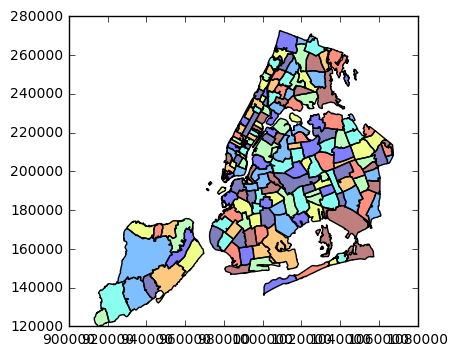

In [123]:
zipgeo = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + 
                                    "/ZIP_CODE_040114.shp")
#"/nyc-zip-code-tabulation-areas-polygons.geojson")
zipgeo.plot()
zipgeo.head()


In [124]:
zipgeo['ZIPCODE'] = zipgeo.ZIPCODE.astype(int)
zipgeo.ZIPCODE

0      11436
1      11213
2      11212
3      11225
4      11218
5      11226
6      11219
7      11210
8      11230
9      11204
10     10471
11     10470
12     10466
13     10467
14     10463
15     10475
16     10464
17     10469
18     10468
19     10463
20     10458
21     10034
22     10033
23     10462
24     10040
25     10453
26     10465
27     10464
28     10464
29     10461
       ...  
233    10120
234    10278
235    10155
236    10043
237    10081
238    10096
239    10097
240    10196
241    10196
242    10275
243    10265
244    10045
245    10047
246    10047
247    10080
248    10203
249    10259
250    10260
251    10285
252    10286
253    10035
254    11371
255    11361
256    10036
257    11414
258    10310
259    11693
260    11249
261    10162
262    10119
Name: ZIPCODE, dtype: int64

In [125]:
f = os.getenv("PUIDATA") + "/zbp00totals.zip"

zf = zipfile.ZipFile(f)
 
business00 = pd.read_csv(zf.open(f.replace('.zip','.txt').\
                             replace(os.getenv("PUIDATA") + '/', '')))
    

In [126]:
f = os.getenv("PUIDATA") + "/zbp10totals.zip"

zf = zipfile.ZipFile(f)
business10 = pd.read_csv(zf.open(f.replace('.zip','.txt').\
                            replace(os.getenv("PUIDATA") + '/', '')))

In [127]:
zipgeo00 = zipgeo.copy()
zipgeo00 = zipgeo00.merge(business00[['EST', 'ZIP']], left_on="ZIPCODE", right_on="ZIP")
zipgeo00.rename(columns={'EST':'nbusiness'}, inplace=True)
zipgeo00

AREA BLDGZIP    COUNTY CTY_FIPS  POPULATION        PO_NAME  \
0    2.269930e+07       0    Queens      081     18681.0        Jamaica   
1    2.963100e+07       0     Kings      047     62426.0       Brooklyn   
2    4.197210e+07       0     Kings      047     83866.0       Brooklyn   
3    2.369863e+07       0     Kings      047     56527.0       Brooklyn   
4    3.686880e+07       0     Kings      047     72280.0       Brooklyn   
5    3.940860e+07       0     Kings      047    106132.0       Brooklyn   
6    4.200274e+07       0     Kings      047     92561.0       Brooklyn   
7    4.788702e+07       0     Kings      047     67067.0       Brooklyn   
8    4.992670e+07       0     Kings      047     80857.0       Brooklyn   
9    4.355518e+07       0     Kings      047     77354.0       Brooklyn   
10   8.965141e+07       0     Bronx      005     23477.0          Bronx   
11   2.154346e+07       0     Bronx      005     14740.0          Bronx   
12   5.526249e+07       0     Bronx      005     68942.0          Bronx   
13   6.933617e+07       0     Bronx      005     97932.0          Bronx   
14   3.670338e+07       0     Bronx      005     70641.0          Bronx   
15   3.119702e+06       0  New York      061     70641.0          Bronx   
16   3.863330e+07       0     Bronx      005     40931.0          Bronx   
17   7.625748e+07       0     Bronx      005      4438.0          Bronx   
18   4.512531e+06       0     Bronx      005      4438.0          Bronx   
19   1.158795e+07       0     Bronx      005      4438.0          Bronx   
20   6.804089e+07       0     Bronx      005     65101.0          Bronx   
21   3.444760e+07       0     Bronx      005     72877.0          Bronx   
22   3.596881e+07       0     Bronx      005     79362.0          Bronx   
23   2.450389e+07       0  New York      061     39149.0       New York   
24   1.615605e+07       0  New York      061     54284.0       New York   
25   5.302251e+07       0     Bronx      005     75674.0          Bronx   
26   1.634074e+07       0  New York      061     41033.0       New York   
27   2.574851e+07       0     Bronx      005     77576.0          Bronx   
28   1.084237e+08       0     Bronx      005     42012.0          Bronx   
29   6.282406e+07       0     Bronx      005     50549.0          Bronx   
..            ...     ...       ...      ...         ...            ...   
223  1.868539e+04       1  New York      061         0.0       New York   
224  2.138027e+04       1  New York      061         0.0       New York   
225  2.568942e+04       1  New York      061         0.0       New York   
226  5.130304e+04       1  New York      061         0.0       New York   
227  1.151048e+05       1  New York      061         0.0       New York   
228  1.613854e+04       1  New York      061         0.0       New York   
229  3.105255e+04       1  New York      061         0.0       New York   
230  3.539577e+04       1  New York      061         0.0       New York   
231  1.622366e+05       1  New York      061         0.0       New York   
232  3.517927e+04       1  New York      061         0.0       New York   
233  2.067060e+05       1  New York      061         0.0       New York   
234  2.478469e+04       1  New York      061         0.0       New York   
235  3.826236e+04       1  New York      061         0.0       New York   
236  3.024051e+04       1  New York      061         0.0       New York   
237  4.210611e+04       1  New York      061         0.0       New York   
238  1.722915e+04       1  New York      061         0.0       New York   
239  4.780899e+04       1  New York      061         0.0       New York   
240  1.014978e+04       1  New York      061         0.0       New York   
241  1.014978e+04       1  New York      061         0.0       New York   
242  7.711145e+04       1  New York      061         0.0       New York   
243  5.251474e+04       1  New York      061         0.0       New York   
244  6.735039e+04       1  New York   

In [128]:
zipgeo10 = zipgeo.copy()
zipgeo10 = zipgeo10.merge(business10[['est', 'zip']], left_on="ZIPCODE", right_on="zip")
zipgeo10.rename(columns={'est':'nbusiness'}, inplace=True)

In [129]:
zipgeo10.columns

Index(['AREA', 'BLDGZIP', 'COUNTY', 'CTY_FIPS', 'POPULATION', 'PO_NAME',
       'SHAPE_AREA', 'SHAPE_LEN', 'STATE', 'ST_FIPS', 'URL', 'ZIPCODE',
       'geometry', 'nbusiness', 'zip'],
      dtype='object')

In [130]:
geocensus00

boro_code boro_ct_2010      boro_name cdeligibil ct_2010  ctlabel  \
0            5      5000900  Staten Island          I  000900        9   
1            5      5007400  Staten Island          I  007400       74   
2            1      1003200      Manhattan          I  003200       32   
3            1      1009800      Manhattan          I  009800       98   
4            1      1010000      Manhattan          I  010000      100   
5            1      1010200      Manhattan          I  010200      102   
6            1      1010400      Manhattan          I  010400      104   
7            1      1011300      Manhattan          I  011300      113   
8            1      1011402      Manhattan          I  011402   114.02   
9            1      1013000      Manhattan          I  013000      130   
10           1      1014000      Manhattan          I  014000      140   
11           1      1014601      Manhattan          I  014601   146.01   
12           1      1014602      Manhattan          I  014602   146.02   
13           1      1014801      Manhattan          I  014801   148.01   
14           1      1014802      Manhattan          I  014802   148.02   
15           1      1015300      Manhattan          I  015300      153   
16           1      1015400      Manhattan          I  015400      154   
17           1      1018400      Manhattan          E  018400      184   
18           1      1019000      Manhattan          I  019000      190   
19           1      1020102      Manhattan          E  020102   201.02   
20           1      1020600      Manhattan          E  020600      206   
21           1      1024900      Manhattan          E  024900      249   
22           1      1025300      Manhattan          E  025300      253   
23           1      1026100      Manhattan          E  026100      261   
24           1      1026300      Manhattan          E  026300      263   
25           1      1026700      Manhattan          E  026700      267   
26           1      1026900      Manhattan          E  026900      269   
27           1      1027700      Manhattan          E  027700      277   
28           3      3002000       Brooklyn          E  002000       20   
29           3      3004100       Brooklyn          I  004100       41   
...        ...          ...            ...        ...     ...      ...   
1899         2      2002400          Bronx          I  002400       24   
1900         3      3117800       Brooklyn          E  117800     1178   
1901         4      4101002         Queens          I  101002  1010.02   
1902         2      2046202          Bronx          E  046202   462.02   
1903         2      2046201          Bronx          I  046201   462.01   
1904         4      4046300         Queens          E  046300      463   
1905         4      4046500         Queens          E  046500      465   
1906         4      4047100         Queens          E  047100      471   
1907         4      4048500         Queens          E  048500      485   
1908         1      1023700      Manhattan          E  023700      237   
1909         1      1024100      Manhattan          E  024100      241   
1910         4      4032000         Queens          I  032000      320   
1911         4      4065600         Queens          I  065600      656   
1912         3      3122000       Brooklyn          E  122000     1220   
1913         2      2023100          Bronx          E  023100      231   
1914         2      2037900          Bronx          E  037900      379   
1915         2      2038100          Bronx          E  038100      381   
1916         4      4066400         Queens          I  066400      664   
1917         4      4071600         Queens          I  071600      716   
1918         4      4000600         Queens          E  000600        6   
1919         4      4000800         Queens          I  000800        8   
1920         4      4033100         Queens          I  033100      331   
1921     

In [131]:
allFeatures = ["population","age","diversity","income"]

In [132]:
from fiona.crs import from_epsg
geocensus00.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
geocensus00 = geocensus00.to_crs(epsg=2263)
geocensus00.head()

boro_code boro_ct_2010      boro_name cdeligibil ct_2010 ctlabel  \
0         5      5000900  Staten Island          I  000900       9   
1         5      5007400  Staten Island          I  007400      74   
2         1      1003200      Manhattan          I  003200      32   
3         1      1009800      Manhattan          I  009800      98   
4         1      1010000      Manhattan          I  010000     100   

                                            geometry ntacode  \
0  (POLYGON ((962269.1260375973 173705.5001830565...    SI22   
1  (POLYGON ((967656.8290405255 155637.1314086347...    SI14   
2  (POLYGON ((989819.2963867191 204093.9949950647...    MN22   
3  (POLYGON ((994133.5070190424 214848.8975829605...    MN19   
4  (POLYGON ((993108.3057861348 216013.1307982849...    MN19   

                                     ntaname  puma     shape_area  \
0  West New Brighton-New Brighton-St. George  3903  2497009.69813   
1            Grasmere-Arrochar-Ft. Wadsworth  3902  5788237.79601   
2                               East Village  3809  2334190.23228   
3                    Turtle Bay-East Midtown  3808  1906016.35002   
4                    Turtle Bay-East Midtown  3808  1860938.37721   

      shape_leng                 allcodes        GEOID                GEO.id  \
0  7729.01679376  (Staten Island, 000900)  36085000900  1400000US36085000900   
1  9902.94847281  (Staten Island, 007400)  36085007400  1400000US36085007400   
2  6358.38668446      (Manhattan, 003200)  36061003200  1400000US36061003200   
3  5534.19981063      (Manhattan, 009800)  36061009800  1400000US36061009800   
4  5692.16873705      (Manhattan, 010000)  36061010000  1400000US36061010000   

  population   age  diversity  income  
0       2109  33.2   0.912755     845  
1       3644  35.7   0.968990    1279  
2       8016  37.3   0.964197    4620  
3       7066  37.8   0.979762    4753  
4       1822  37.9   0.979693    1242

In [136]:
geocensus10.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
geocensus10 = geocensus10.to_crs(epsg=2263)
geocensus10.head()

boro_code boro_ct_2010      boro_name cdeligibil ct_2010 ctlabel  \
0         5      5000900  Staten Island          I  000900       9   
1         5      5007400  Staten Island          I  007400      74   
2         1      1003200      Manhattan          I  003200      32   
3         1      1009800      Manhattan          I  009800      98   
4         1      1010000      Manhattan          I  010000     100   

                                            geometry ntacode  \
0  (POLYGON ((962269.1260375973 173705.5001830565...    SI22   
1  (POLYGON ((967656.8290405255 155637.1314086347...    SI14   
2  (POLYGON ((989819.2963867191 204093.9949950647...    MN22   
3  (POLYGON ((994133.5070190424 214848.8975829605...    MN19   
4  (POLYGON ((993108.3057861348 216013.1307982849...    MN19   

                                     ntaname  puma     shape_area  \
0  West New Brighton-New Brighton-St. George  3903  2497009.69813   
1            Grasmere-Arrochar-Ft. Wadsworth  3902  5788237.79601   
2                               East Village  3809  2334190.23228   
3                    Turtle Bay-East Midtown  3808  1906016.35002   
4                    Turtle Bay-East Midtown  3808  1860938.37721   

      shape_leng                 allcodes        GEOID                GEO.id  \
0  7729.01679376  (Staten Island, 000900)  36085000900  1400000US36085000900   
1  9902.94847281  (Staten Island, 007400)  36085007400  1400000US36085007400   
2  6358.38668446      (Manhattan, 003200)  36061003200  1400000US36061003200   
3  5534.19981063      (Manhattan, 009800)  36061009800  1400000US36061009800   
4  5692.16873705      (Manhattan, 010000)  36061010000  1400000US36061010000   

  population   age  diversity  income  \
0       2112  34.2   0.932765     693   
1       4693  37.6   0.969529    1477   
2       8234  36.3   0.965630    4710   
3       7316  37.5   0.980590    4253   
4       1992  38.2   0.975904    1207   

                             GEO.display-label  
0    Census Tract 9, Richmond County, New York  
1   Census Tract 74, Richmond County, New York  
2   Census Tract 32, New York County, New York  
3   Census Tract 98, New York County, New York  
4  Census Tract 100, New York County, New York

In [134]:
for f in allFeatures:
    zipgeo00[f] = np.zeros(len(zipgeo00))
for i,z in enumerate(zipgeo00.geometry):
    indx = [z.contains(g.centroid) for g in geocensus00.geometry]
    for f in allFeatures:
        #print (f, geocensus00[indx][[f]])
        #print (" ")
        #print (np.nanmean(np.array((geocensus00[indx][[f]]).values.flatten().\
        #astype(float))))
        try: 
            m = (np.nanmean(np.array((geocensus00[indx][[f]]).values.flatten().\
                                      astype(float))))
        except IndexError: 
            m = np.nan
        zipgeo00.set_value(i, f,  m)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_

In [137]:
zipgeo00

AREA BLDGZIP    COUNTY CTY_FIPS  POPULATION        PO_NAME  \
0    2.269930e+07       0    Queens      081     18681.0        Jamaica   
1    2.963100e+07       0     Kings      047     62426.0       Brooklyn   
2    4.197210e+07       0     Kings      047     83866.0       Brooklyn   
3    2.369863e+07       0     Kings      047     56527.0       Brooklyn   
4    3.686880e+07       0     Kings      047     72280.0       Brooklyn   
5    3.940860e+07       0     Kings      047    106132.0       Brooklyn   
6    4.200274e+07       0     Kings      047     92561.0       Brooklyn   
7    4.788702e+07       0     Kings      047     67067.0       Brooklyn   
8    4.992670e+07       0     Kings      047     80857.0       Brooklyn   
9    4.355518e+07       0     Kings      047     77354.0       Brooklyn   
10   8.965141e+07       0     Bronx      005     23477.0          Bronx   
11   2.154346e+07       0     Bronx      005     14740.0          Bronx   
12   5.526249e+07       0     Bronx      005     68942.0          Bronx   
13   6.933617e+07       0     Bronx      005     97932.0          Bronx   
14   3.670338e+07       0     Bronx      005     70641.0          Bronx   
15   3.119702e+06       0  New York      061     70641.0          Bronx   
16   3.863330e+07       0     Bronx      005     40931.0          Bronx   
17   7.625748e+07       0     Bronx      005      4438.0          Bronx   
18   4.512531e+06       0     Bronx      005      4438.0          Bronx   
19   1.158795e+07       0     Bronx      005      4438.0          Bronx   
20   6.804089e+07       0     Bronx      005     65101.0          Bronx   
21   3.444760e+07       0     Bronx      005     72877.0          Bronx   
22   3.596881e+07       0     Bronx      005     79362.0          Bronx   
23   2.450389e+07       0  New York      061     39149.0       New York   
24   1.615605e+07       0  New York      061     54284.0       New York   
25   5.302251e+07       0     Bronx      005     75674.0          Bronx   
26   1.634074e+07       0  New York      061     41033.0       New York   
27   2.574851e+07       0     Bronx      005     77576.0          Bronx   
28   1.084237e+08       0     Bronx      005     42012.0          Bronx   
29   6.282406e+07       0     Bronx      005     50549.0          Bronx   
..            ...     ...       ...      ...         ...            ...   
223  1.868539e+04       1  New York      061         0.0       New York   
224  2.138027e+04       1  New York      061         0.0       New York   
225  2.568942e+04       1  New York      061         0.0       New York   
226  5.130304e+04       1  New York      061         0.0       New York   
227  1.151048e+05       1  New York      061         0.0       New York   
228  1.613854e+04       1  New York      061         0.0       New York   
229  3.105255e+04       1  New York      061         0.0       New York   
230  3.539577e+04       1  New York      061         0.0       New York   
231  1.622366e+05       1  New York      061         0.0       New York   
232  3.517927e+04       1  New York      061         0.0       New York   
233  2.067060e+05       1  New York      061         0.0       New York   
234  2.478469e+04       1  New York      061         0.0       New York   
235  3.826236e+04       1  New York      061         0.0       New York   
236  3.024051e+04       1  New York      061         0.0       New York   
237  4.210611e+04       1  New York      061         0.0       New York   
238  1.722915e+04       1  New York      061         0.0       New York   
239  4.780899e+04       1  New York      061         0.0       New York   
240  1.014978e+04       1  New York      061         0.0       New York   
241  1.014978e+04       1  New York      061         0.0       New York   
242  7.711145e+04       1  New York      061         0.0       New York   
243  5.251474e+04       1  New York      061         0.0       New York   
244  6.735039e+04       1  New York   

In [138]:
for f in allFeatures:
    zipgeo10[f] = np.zeros(len(zipgeo10))
for i,z in enumerate(zipgeo10.geometry):
    indx = [z.contains(g.centroid) for g in geocensus10.geometry]
    for f in allFeatures:
        #print (f, geocensus00[indx][[f]])
        #print (" ")
        #print (np.nanmean(np.array((geocensus00[indx][[f]]).values.flatten().astype(float))))
        m = (np.nanmean(np.array((geocensus10[indx][[f]]).values.flatten().astype(float))))
        try: 
            m = (np.nanmean(np.array((geocensus10[indx][[f]]).values.flatten().astype(float))))
        except IndexError: 
            m = np.nan
        zipgeo10.set_value(i, f,  m)
        
zipgeo10

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_

AREA BLDGZIP    COUNTY CTY_FIPS  POPULATION        PO_NAME  \
0    2.269930e+07       0    Queens      081     18681.0        Jamaica   
1    2.963100e+07       0     Kings      047     62426.0       Brooklyn   
2    4.197210e+07       0     Kings      047     83866.0       Brooklyn   
3    2.369863e+07       0     Kings      047     56527.0       Brooklyn   
4    3.686880e+07       0     Kings      047     72280.0       Brooklyn   
5    3.940860e+07       0     Kings      047    106132.0       Brooklyn   
6    4.200274e+07       0     Kings      047     92561.0       Brooklyn   
7    4.788702e+07       0     Kings      047     67067.0       Brooklyn   
8    4.992670e+07       0     Kings      047     80857.0       Brooklyn   
9    4.355518e+07       0     Kings      047     77354.0       Brooklyn   
10   8.965141e+07       0     Bronx      005     23477.0          Bronx   
11   2.154346e+07       0     Bronx      005     14740.0          Bronx   
12   5.526249e+07       0     Bronx      005     68942.0          Bronx   
13   6.933617e+07       0     Bronx      005     97932.0          Bronx   
14   3.670338e+07       0     Bronx      005     70641.0          Bronx   
15   3.119702e+06       0  New York      061     70641.0          Bronx   
16   3.863330e+07       0     Bronx      005     40931.0          Bronx   
17   7.625748e+07       0     Bronx      005      4438.0          Bronx   
18   4.512531e+06       0     Bronx      005      4438.0          Bronx   
19   1.158795e+07       0     Bronx      005      4438.0          Bronx   
20   6.804089e+07       0     Bronx      005     65101.0          Bronx   
21   3.444760e+07       0     Bronx      005     72877.0          Bronx   
22   3.596881e+07       0     Bronx      005     79362.0          Bronx   
23   2.450389e+07       0  New York      061     39149.0       New York   
24   1.615605e+07       0  New York      061     54284.0       New York   
25   5.302251e+07       0     Bronx      005     75674.0          Bronx   
26   1.634074e+07       0  New York      061     41033.0       New York   
27   2.574851e+07       0     Bronx      005     77576.0          Bronx   
28   1.084237e+08       0     Bronx      005     42012.0          Bronx   
29   6.282406e+07       0     Bronx      005     50549.0          Bronx   
..            ...     ...       ...      ...         ...            ...   
225  2.138027e+04       1  New York      061         0.0       New York   
226  2.568942e+04       1  New York      061         0.0       New York   
227  5.130304e+04       1  New York      061         0.0       New York   
228  1.151048e+05       1  New York      061         0.0       New York   
229  1.613854e+04       1  New York      061         0.0       New York   
230  3.105255e+04       1  New York      061         0.0       New York   
231  3.539577e+04       1  New York      061         0.0       New York   
232  1.622366e+05       1  New York      061         0.0       New York   
233  3.517927e+04       1  New York      061         0.0       New York   
234  2.067060e+05       1  New York      061         0.0       New York   
235  2.478469e+04       1  New York      061         0.0       New York   
236  3.826236e+04       1  New York      061         0.0       New York   
237  3.024051e+04       1  New York      061         0.0       New York   
238  4.210611e+04       1  New York      061         0.0       New York   
239  4.828042e+04       1  New York      061         0.0       New York   
240  1.722915e+04       1  New York      061         0.0       New York   
241  4.780899e+04       1  New York      061         0.0       New York   
242  7.711145e+04       1  New York      061         0.0       New York   
243  3.722688e+04       1  New York      061         0.0       New York   
244  5.251474e+04       1  New York      061         0.0       New York   
245  6.735039e+04       1  New York      061         0.0       New York   
246  1.126441e+04       1  New York   

In [139]:
allFeatureszip = allFeatures + ["nbusiness"]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


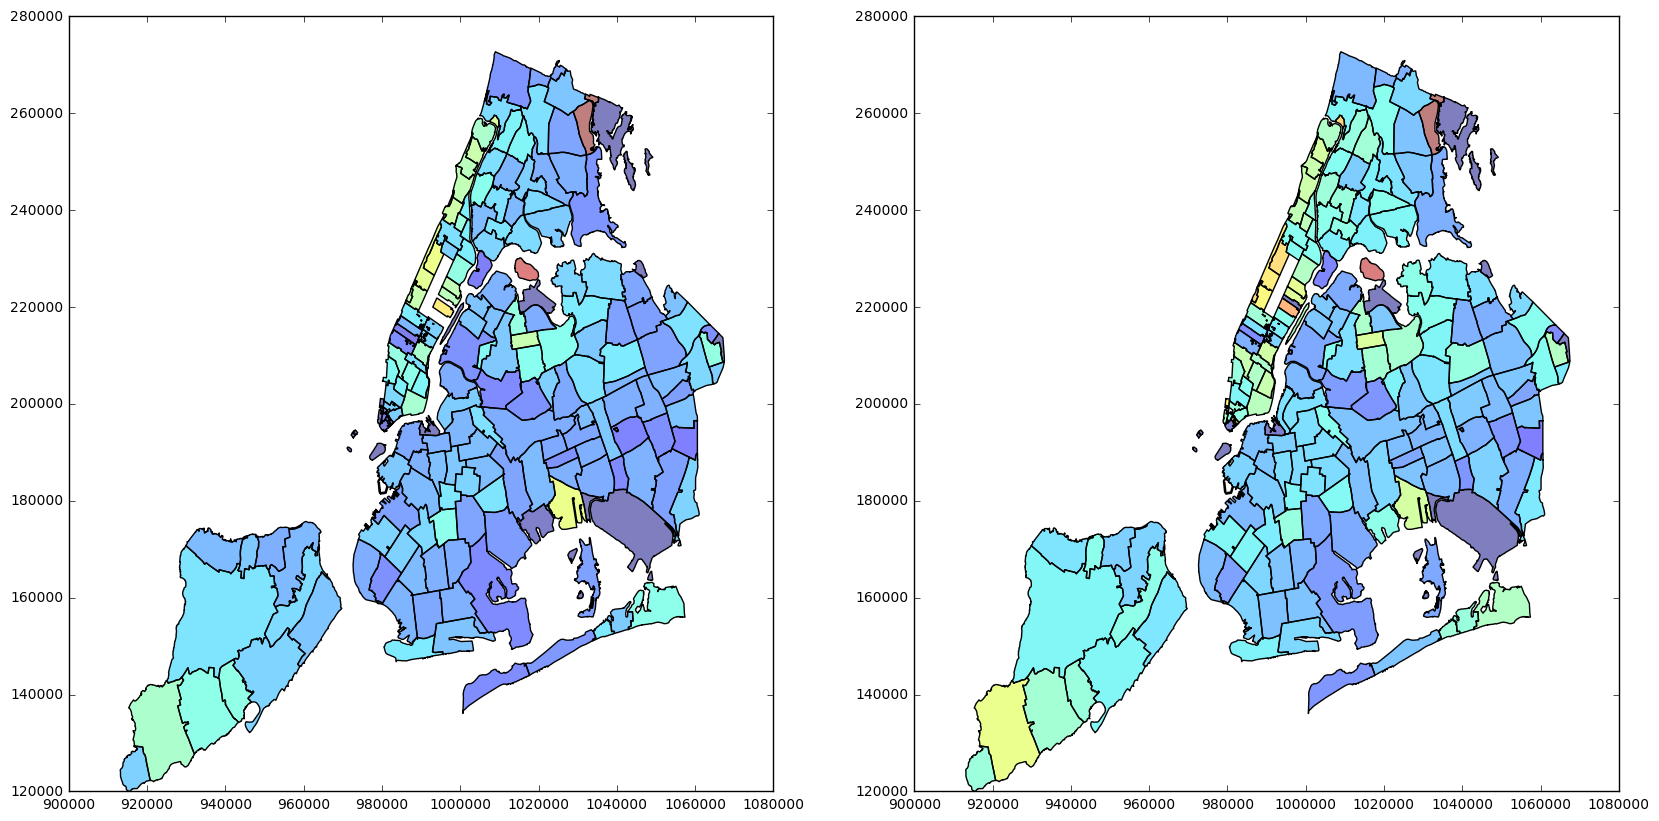

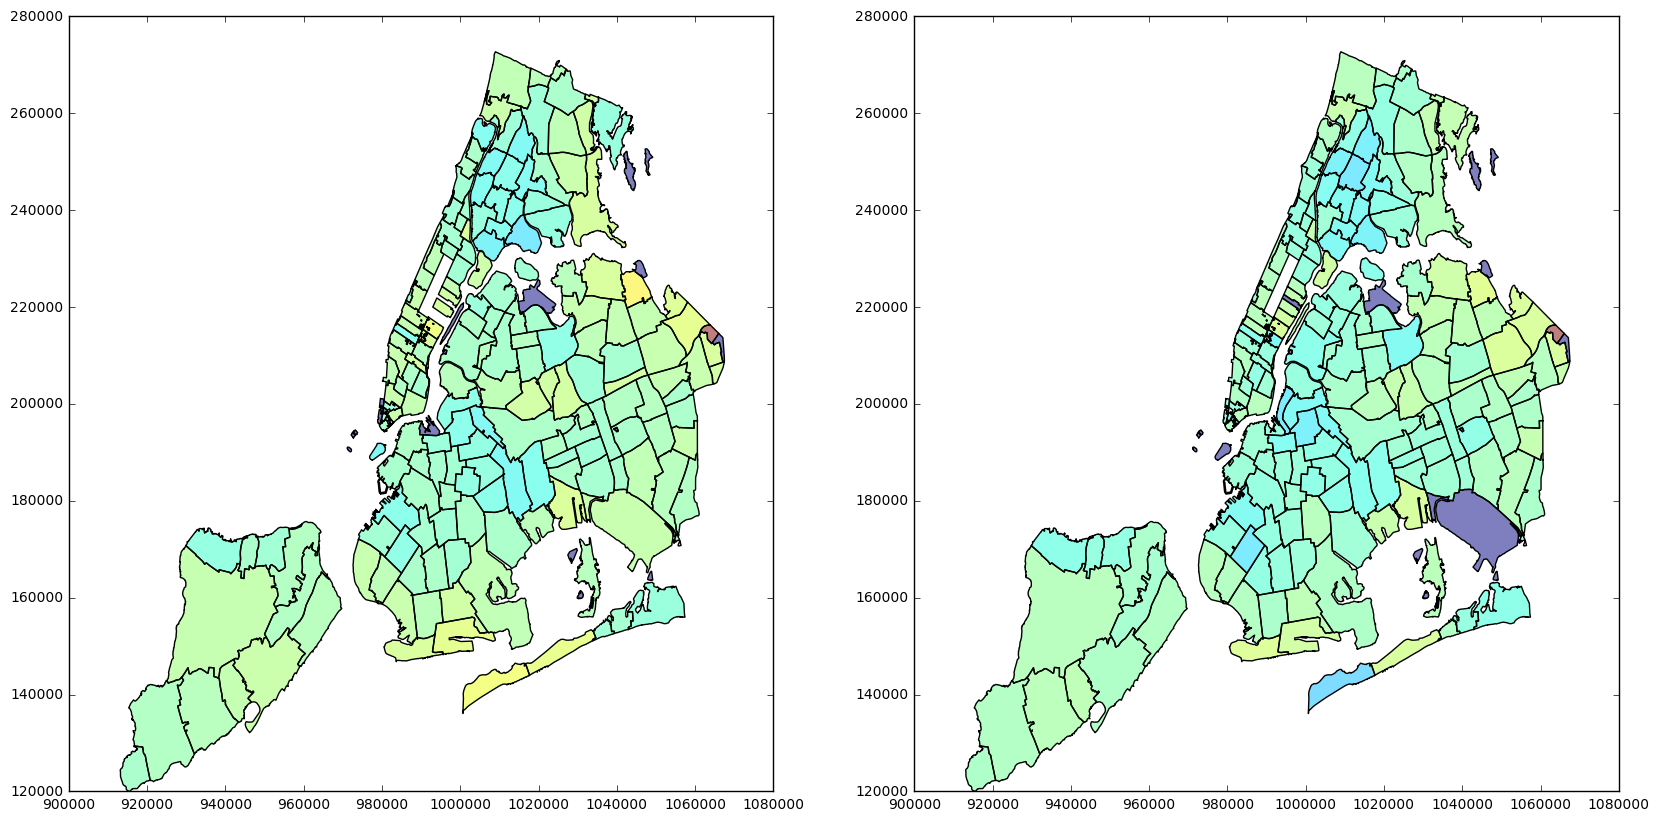

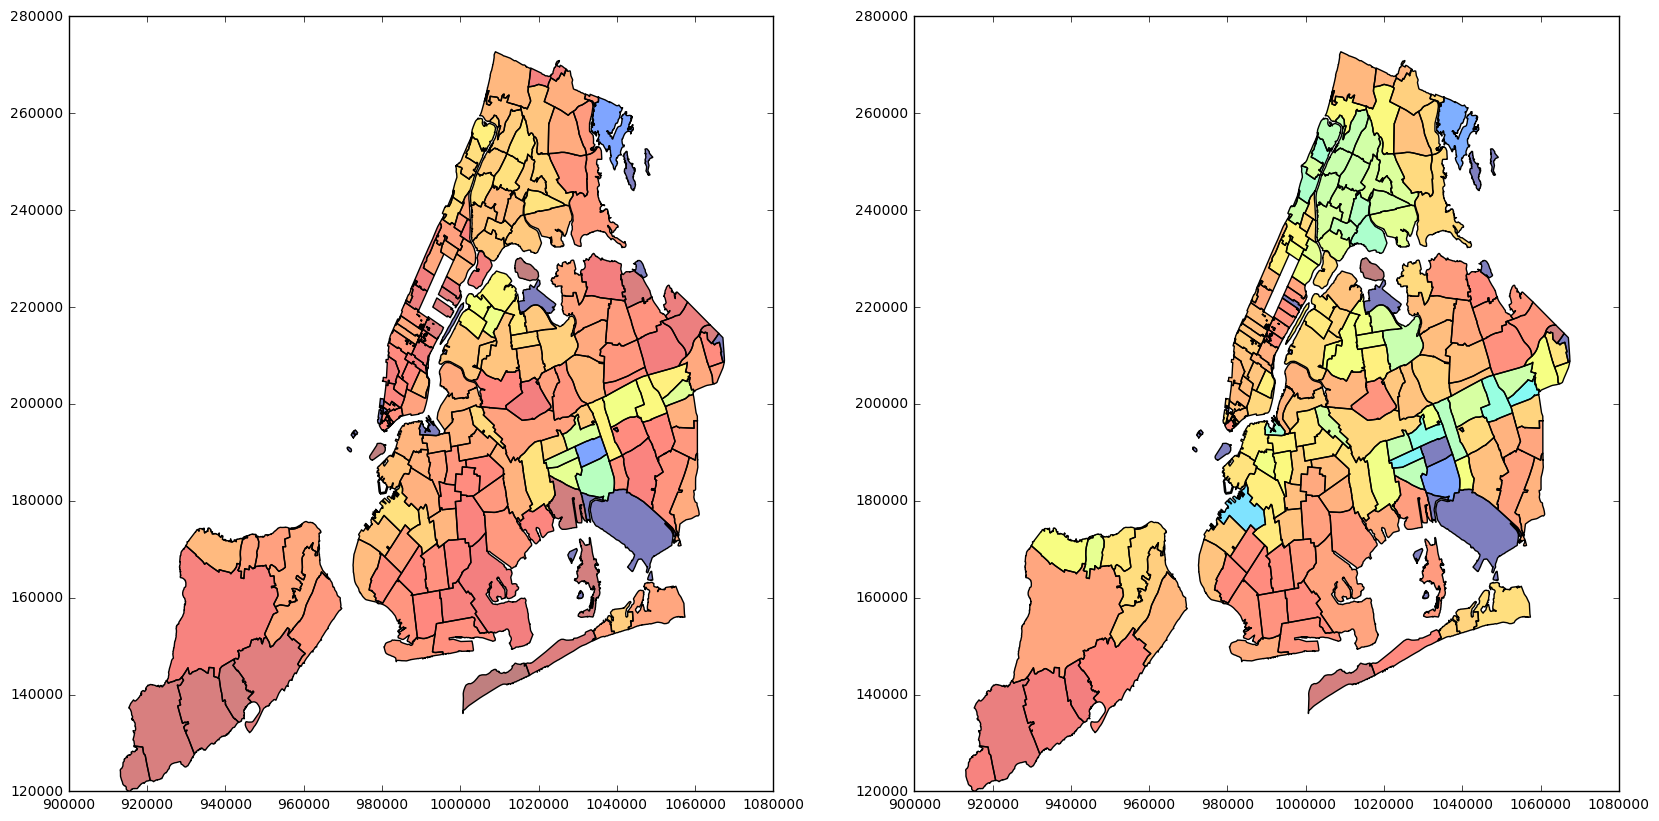

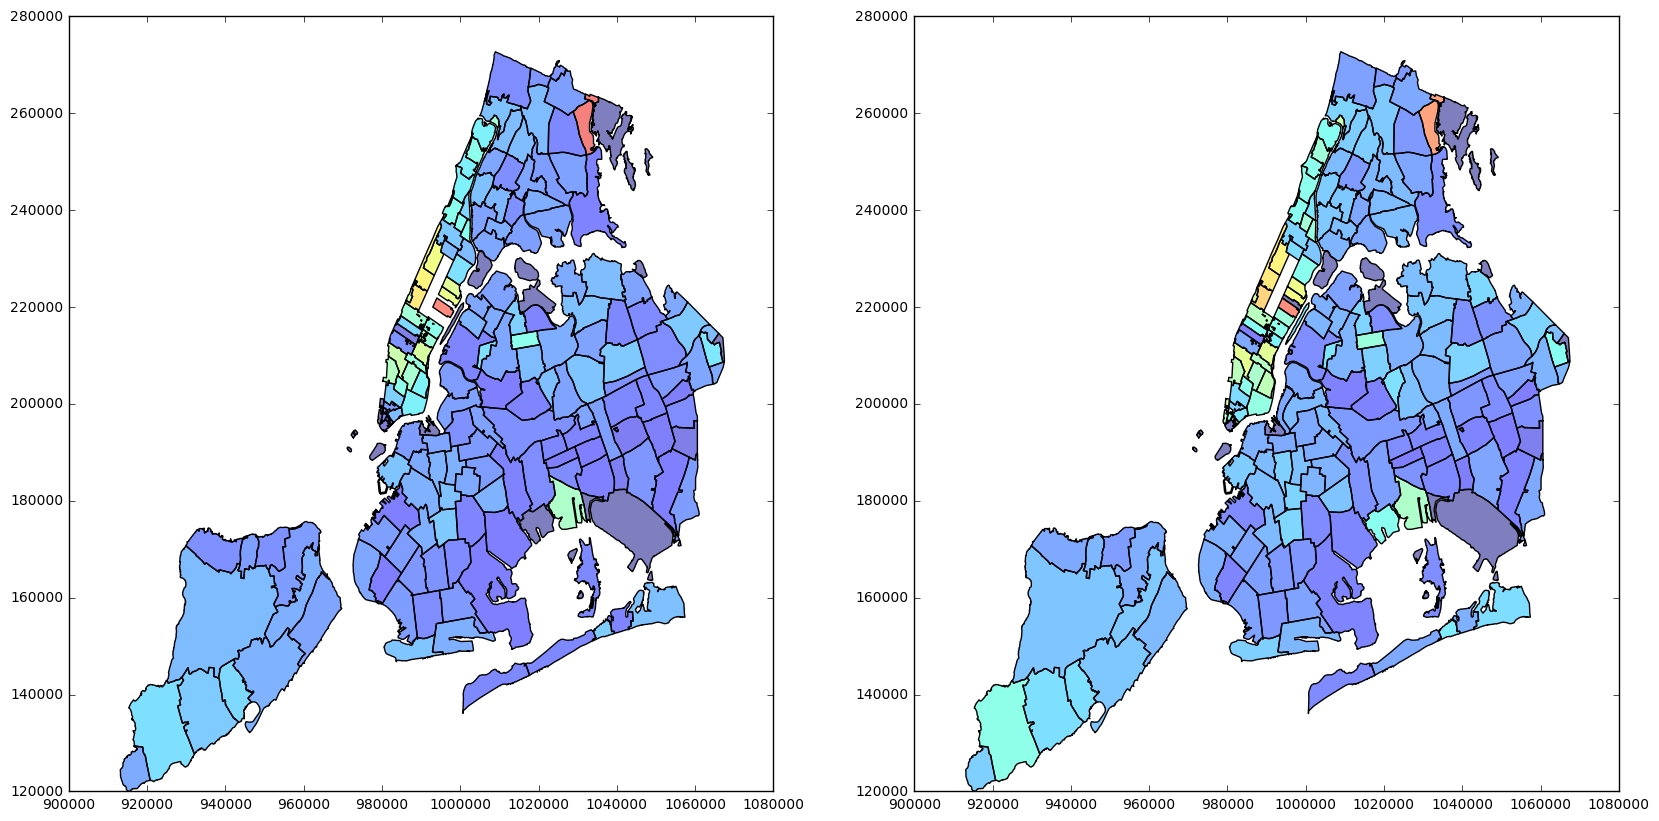

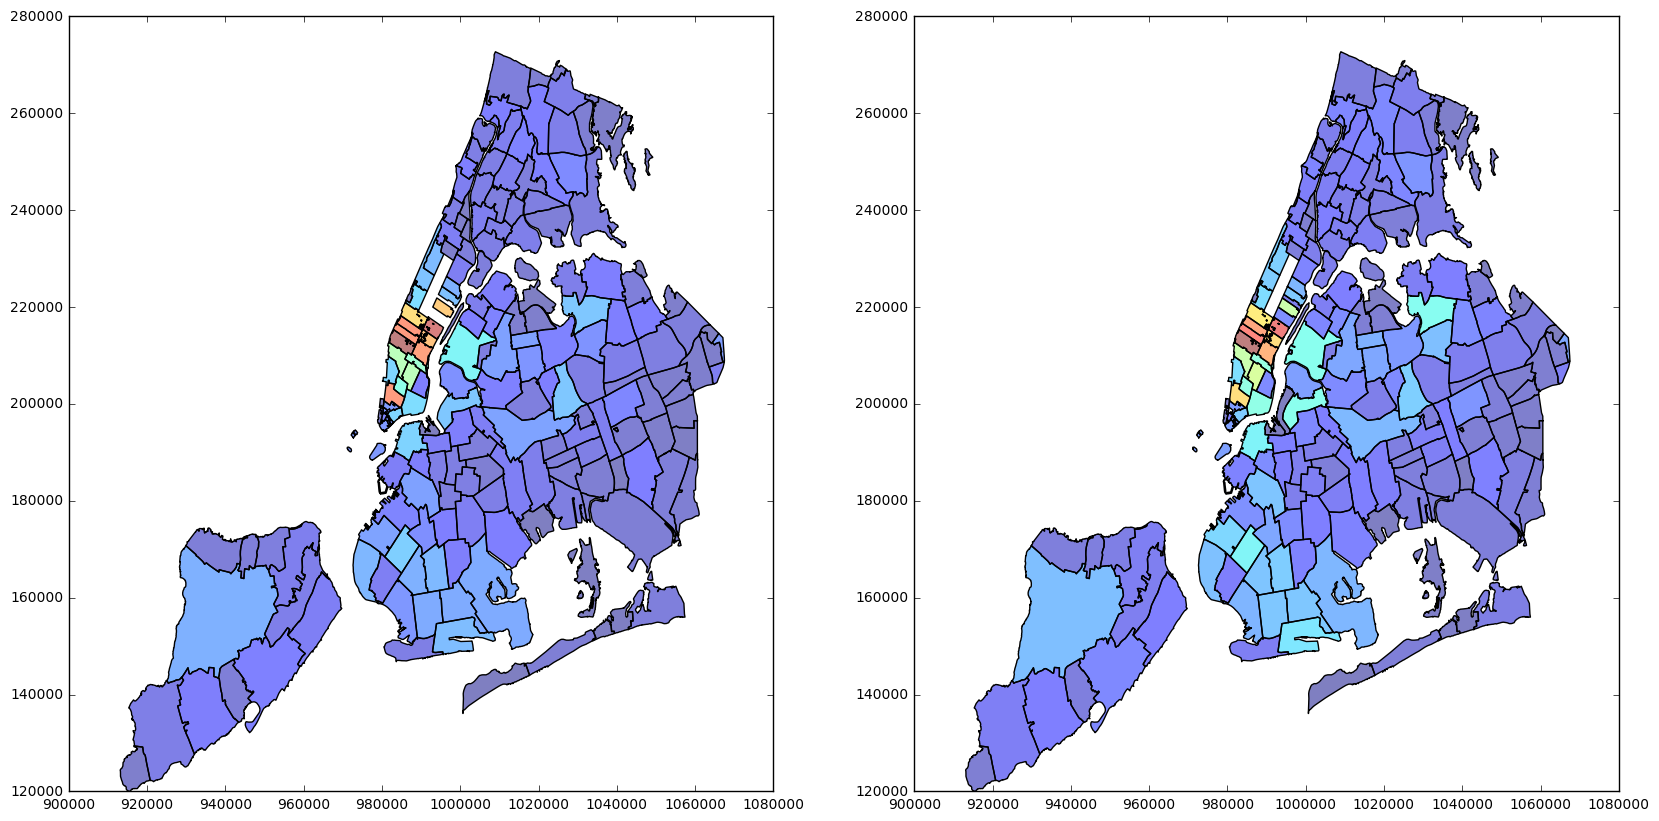

In [140]:
import pylab as pl
for f in allFeatureszip: 
    fig = pl.figure(figsize=(20,10))
    ax = fig.add_subplot(121)
    zipgeo00.plot(column=f, axes=ax)
    ax = fig.add_subplot(122)
    zipgeo10.plot(column=f, axes=ax)

In [ ]:
geocensus00.plot()
geocensus10.plot()

In [ ]:
geocensus00

In [141]:
import sklearn as skl
from sklearn import preprocessing, cluster
vals10 = skl.preprocessing.scale(geocensus10[allFeatures].dropna().values)
vals00 = skl.preprocessing.scale(geocensus00[allFeatures].dropna().values)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [142]:
nc = 5

km10 = skl.cluster.KMeans(n_clusters=nc)


km10.fit(vals10)

clustersdf10 = gpd.GeoDataFrame()
clustersdf10 = geocensus10[['GEOID', 'geometry'] + allFeatures].dropna()
clustersdf10['cluster'] = km10.labels_

In [143]:
nc = 5

km00 = skl.cluster.KMeans(n_clusters=nc, init=km10.cluster_centers_)


km00.fit(vals00)

clustersdf00 = gpd.GeoDataFrame()
clustersdf00 = geocensus00[['GEOID', 'geometry'] + allFeatures].dropna()
clustersdf00['cluster'] = km00.labels_

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:821: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  n_jobs=self.n_jobs)


In [144]:
clustersdf10

GEOID                                           geometry  \
0     36085000900  (POLYGON ((962269.1260375973 173705.5001830565...   
1     36085007400  (POLYGON ((967656.8290405255 155637.1314086347...   
2     36061003200  (POLYGON ((989819.2963867191 204093.9949950647...   
3     36061009800  (POLYGON ((994133.5070190424 214848.8975829605...   
4     36061010000  (POLYGON ((993108.3057861348 216013.1307982849...   
5     36061010200  (POLYGON ((992216.5391845678 216507.687011669,...   
6     36061010400  (POLYGON ((991325.8815917961 217001.6885985838...   
7     36061011300  (POLYGON ((988650.2766113301 214286.402221621,...   
8     36061011402  (POLYGON ((994013.2479858421 217645.2996215287...   
9     36061013000  (POLYGON ((994920.1096191405 221386.2695922347...   
10    36061014000  (POLYGON ((996728.3079834008 222545.6896361779...   
11    36061014601  (POLYGON ((998271.5234374972 222317.6588134317...   
12    36061014602  (POLYGON ((998660.5087890624 223021.3121947719...   
13    36061014801  (POLYGON ((996994.3508300774 223026.0794066851...   
14    36061014802  (POLYGON ((997637.4860229518 224187.0347899925...   
15    36061015300  (POLYGON ((990644.7542114267 221597.9421996512...   
16    36061015400  (POLYGON ((999296.2000122084 224165.9653930165...   
17    36061018400  (POLYGON ((1000359.281799312 231194.4124144999...   
18    36061019000  (POLYGON ((999462.7775878883 231690.0969848142...   
19    36061020102  (POLYGON ((996869.5118408224 232827.7326049279...   
20    36061020600  (POLYGON ((1002020.029785158 234205.4003905724...   
21    36061024900  (POLYGON ((1001768.304382326 244295.7377929093...   
22    36061025300  (POLYGON ((1001537.766784668 246825.5615844153...   
23    36061025700  (POLYGON ((997902.8200073252 234692.8829955587...   
24    36061026100  (POLYGON ((1003231.182006839 248025.828185986,...   
25    36061026300  (POLYGON ((1002443.483398439 248461.6937865712...   
26    36061026700  (POLYGON ((1003444.596984864 248409.5513915459...   
27    36061026900  (POLYGON ((1004252.748413088 249870.0369872552...   
28    36061027700  (POLYGON ((1004252.748413088 249870.0369872552...   
29    36047000501  (POLYGON ((986185.9869995115 193380.8801879372...   
...           ...                                                ...   
2134  36005002000  (POLYGON ((1022317.859008792 237780.8721923239...   
2135  36005002400  (POLYGON ((1020092.676635742 238184.5195922357...   
2136  36047117800  (POLYGON ((1019873.30358887 187658.5657958442,...   
2137  36081101002  (POLYGON ((1055459.405822755 156032.9703979003...   
2138  36005046202  (POLYGON ((1033945.745605468 261958.8807982883...   
2139  36005046201  (POLYGON ((1033945.745605468 261958.8807982883...   
2140  36081046300  (POLYGON ((1020802.261840821 210946.5599975056...   
2141  36081046500  (POLYGON ((1020802.261840821 210946.5599975056...   
2142  36081047100  (POLYGON ((1019307.750427248 209815.0527953517...   
2143  36081048500  (POLYGON ((1017426.13684082 209373.9450072722,...   
2144  36061023700  (POLYGON ((1000029.442993163 242245.0491942847...   
2145  36061024100  (POLYGON ((999628.6235961929 243378.8953856884...   
2146  36081032000  (POLYGON ((1051487.927795412 182175.5419921339...   
2147  36081065600  (POLYGON ((1060539.82562256 177486.6574096172,...   
2148  36081006202  (POLYGON ((1023025.84399414 177897.2499999449,...   
2149  36047122000  (POLYGON ((1022345.459228519 178894.3250121573...   
2150  36005023100  (POLYGON ((1012007.899597168 248037.859191835,...   
2151  36005037900  (POLYGON ((1012420.960021975 250846.7839965335...   
2152  36005038100  (POLYGON ((1012252.06262207 250925.602600043, ...   
2153  36081066400  (POLYGON ((1056903.655029297 179168.2421874513...   
2155  36081000600  (POLYGON ((1022946.834228517 188809.537841742,...   
2156  36081000800  (POLYGON ((1024508.307434082 189400.563598577,...   
2158  36081034700  (POLYGON ((1018728.47003174 217731.0209960405,...   
2159  36047118400  (POLYGON ((1021331.049987794 1882

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


(900000.0, 1080000.0, 120000.0, 280000.0)

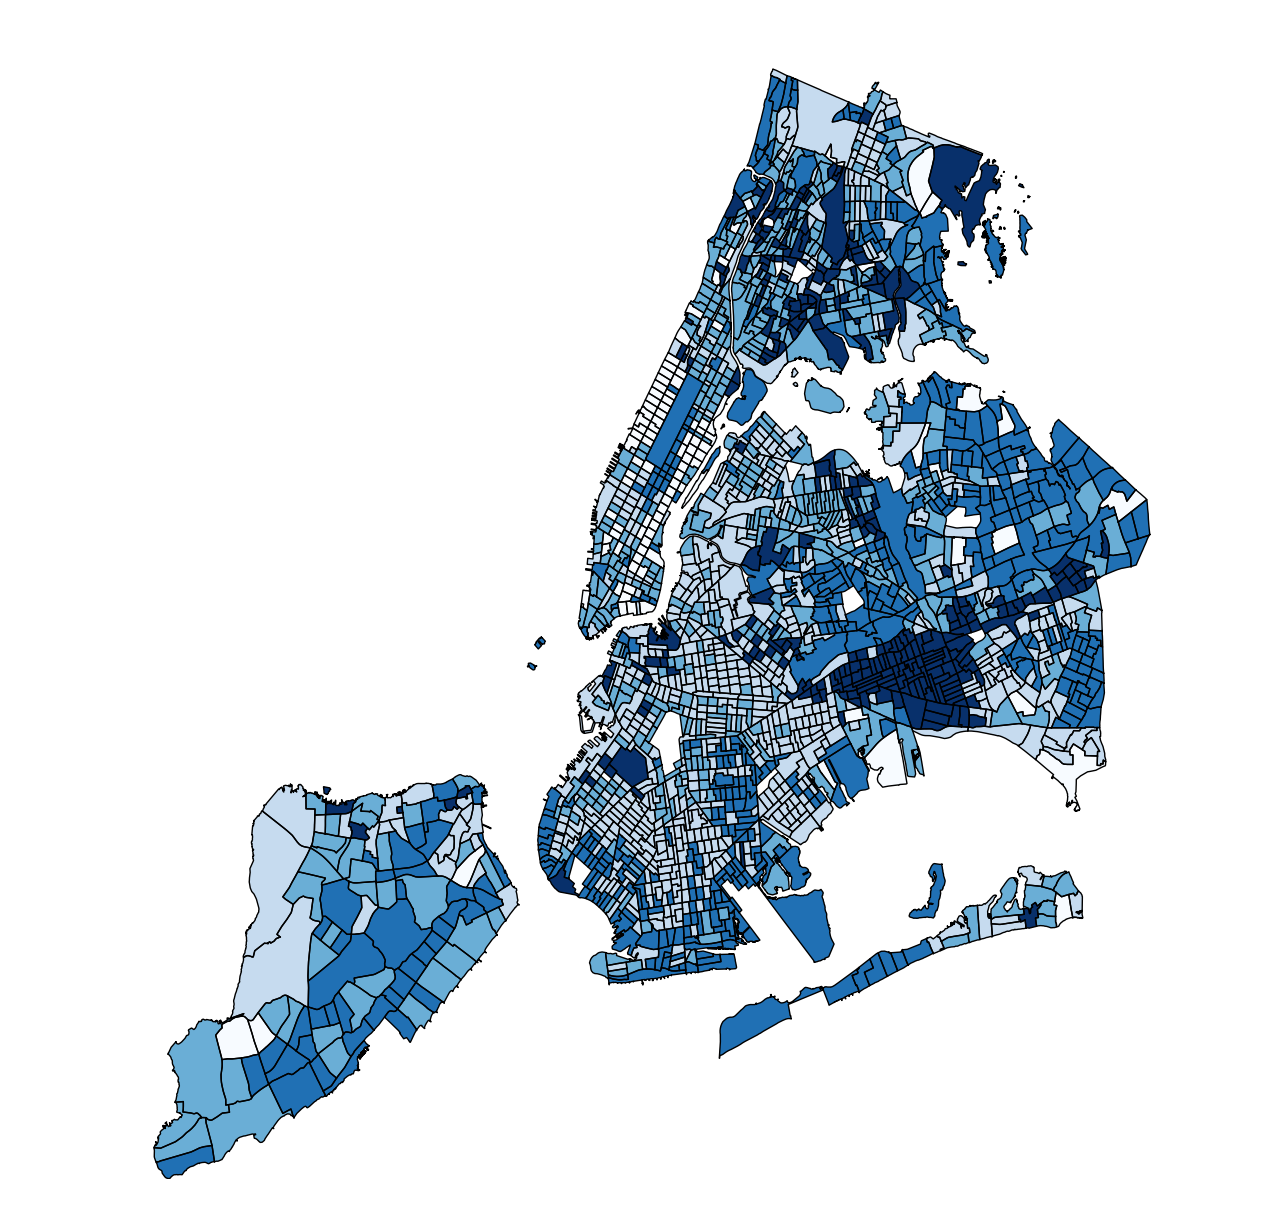

In [145]:
import pylab as pl
ax = pl.figure(figsize=(15,15)).add_subplot(111)
clustersdf10.plot(column='cluster', colormap='Blues', alpha = 1, axes=ax)
ax.axis('off')

In [146]:
geocensus10.shape

(2166, 20)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


(900000.0, 1080000.0, 120000.0, 280000.0)

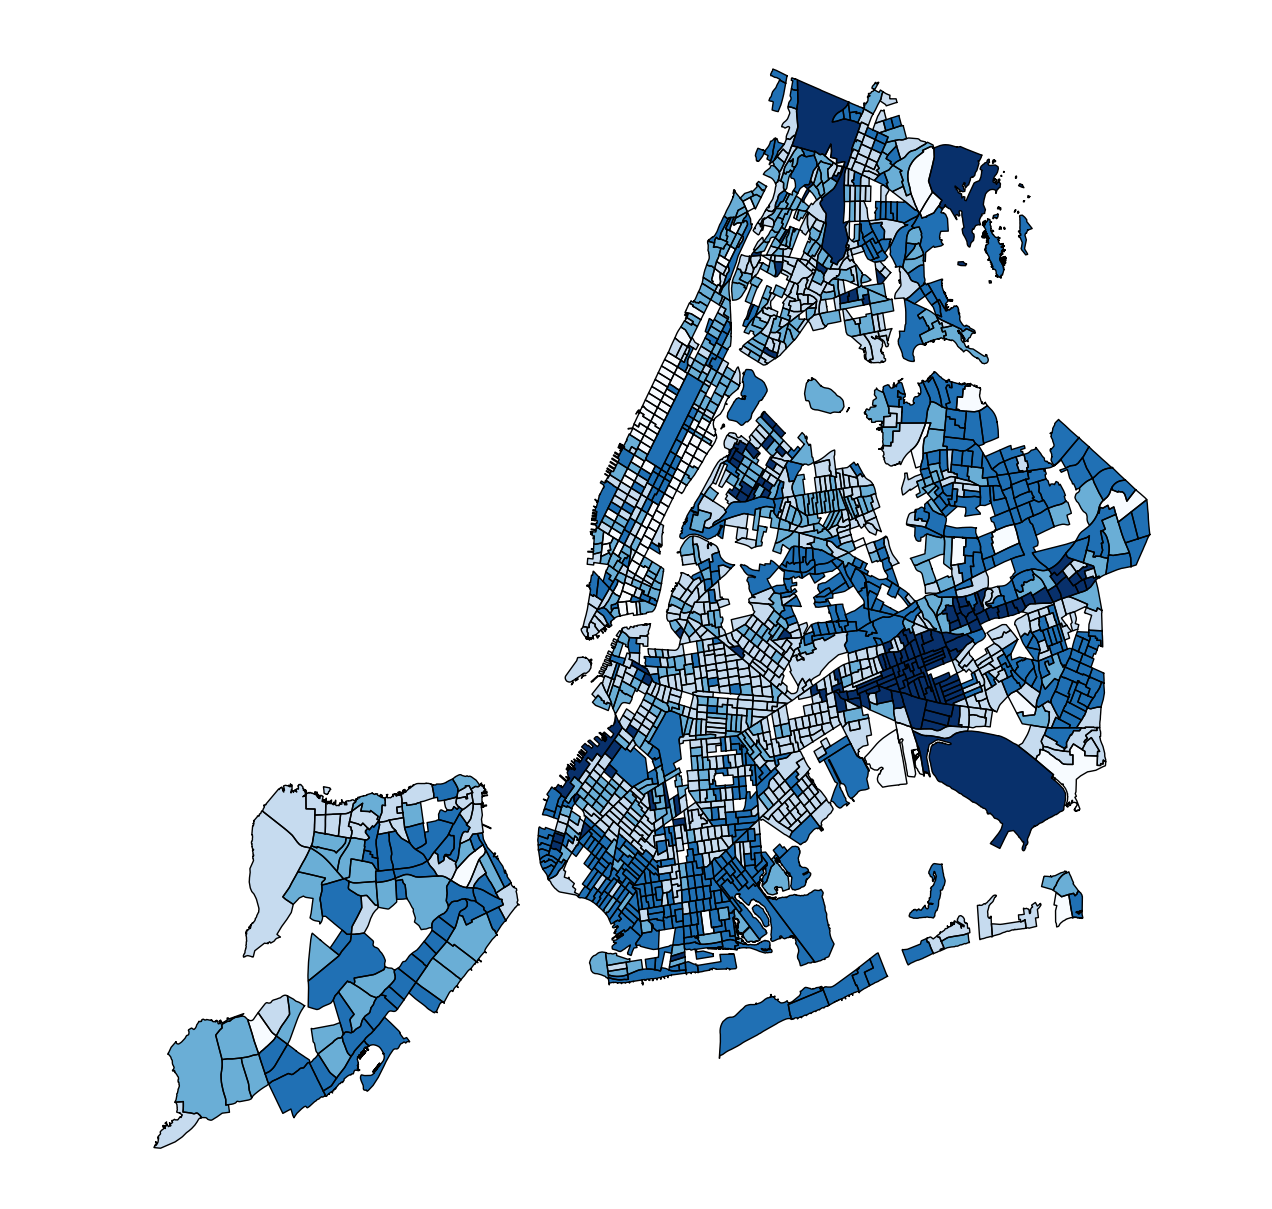

In [147]:
ax = pl.figure(figsize=(15,15)).add_subplot(111)
clustersdf00.plot(column='cluster', colormap='Blues', alpha = 1, axes=ax)
ax.axis('off')

In [148]:
mergedclusters = pd.merge(clustersdf00, clustersdf10, on="GEOID")

In [149]:
mergedclusters['changes'] = mergedclusters['cluster_x'] - mergedclusters['cluster_y']
mergedclusters[['cluster_x', 'cluster_y']]
mergedclusters['geometry'] = mergedclusters['geometry_x']

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


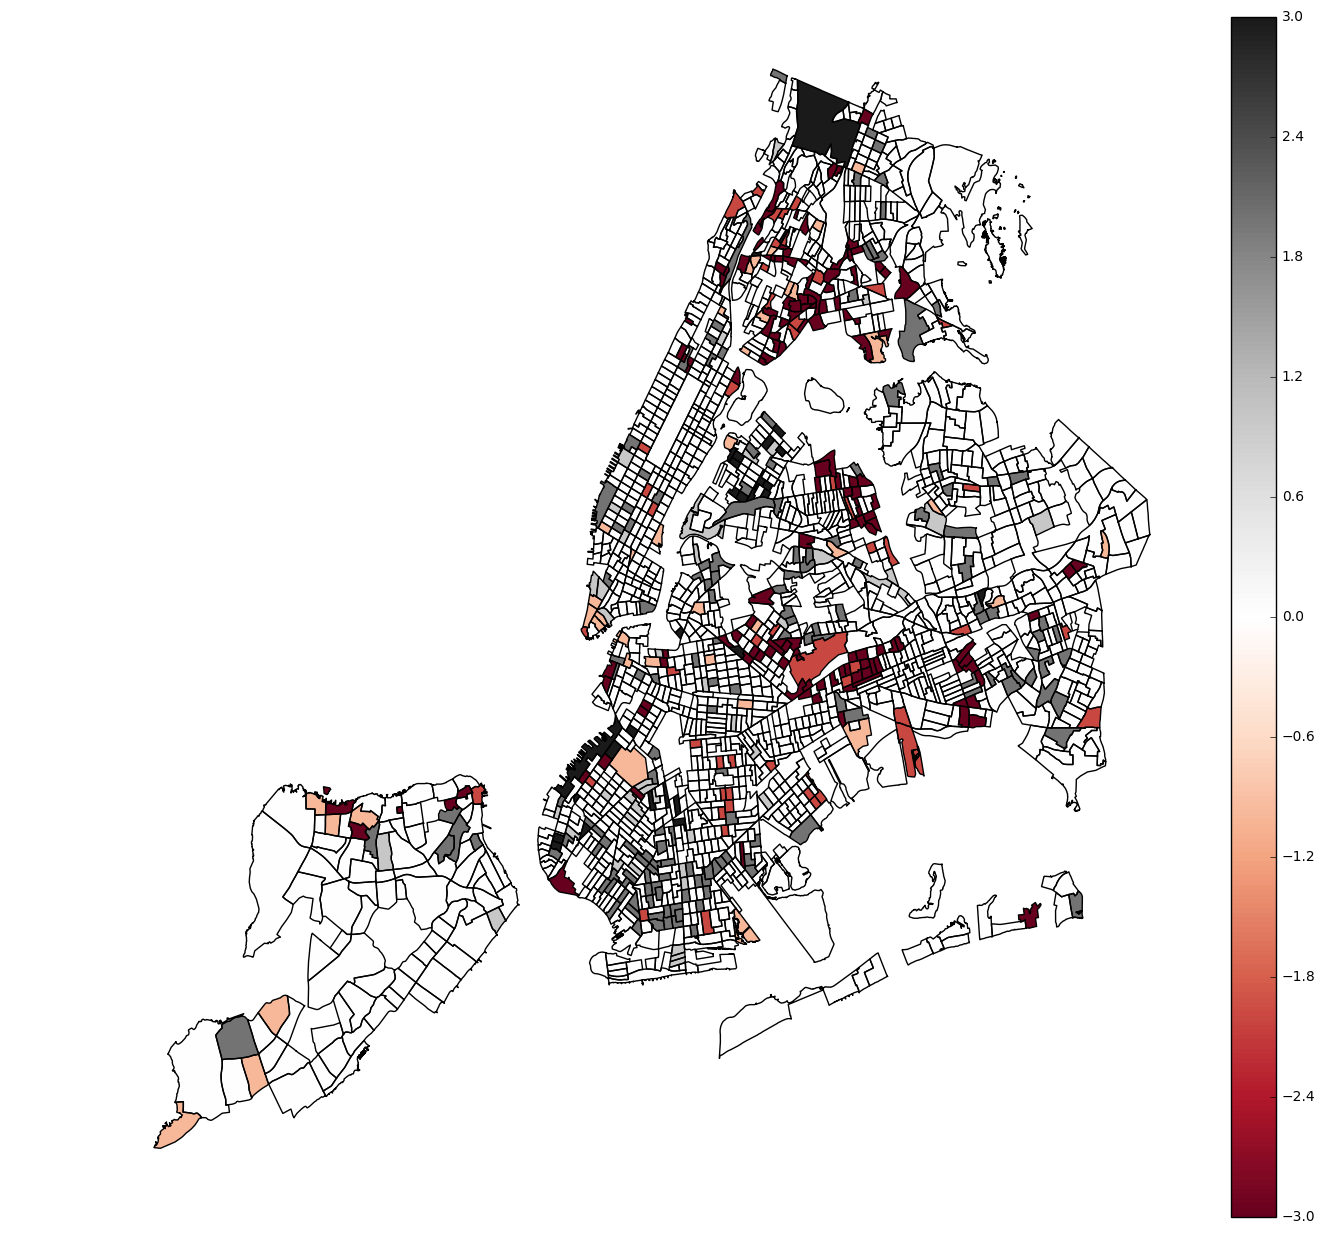

In [150]:
ax = pl.figure(figsize=(15,15)).add_subplot(111)
ax = mergedclusters.plot(column='changes',  colormap='RdGy', alpha = 1, axes=ax)
vmin, vmax = min(mergedclusters['changes'].values), max(mergedclusters['changes'].values)
ax.axis('off')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='RdGy', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)


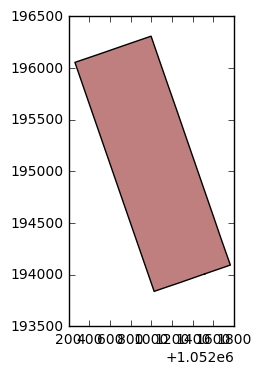

In [152]:
stalbans = 36081051800
geocensus00[(geocensus00['GEOID'] == stalbans)].plot()

In [153]:
km00.cluster_centers_[1]
km00.cluster_centers_[0]


array([ 2.52830477,  0.53382248,  0.49047794,  3.15930162])

In [159]:
!wget http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nybb_16d.zip
!unzip nybb_16d.zip
!mv nybb_16d {os.getenv("PUIDATA")}

--2016-12-16 01:16:00--  http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nybb_16d.zip
Resolving www1.nyc.gov... 23.204.107.3, 2600:141b:5:193::1500, 2600:141b:5:18b::1500
Connecting to www1.nyc.gov|23.204.107.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 660325 (645K) [application/zip]
Saving to: “nybb_16d.zip.1”

100%[======================================>] 660,325     --.-K/s   in 0.02s   

2016-12-16 01:16:00 (28.3 MB/s) - “nybb_16d.zip.1” saved [660325/660325]

Archive:  nybb_16d.zip
replace nybb_16d/nybb.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
mv: setting attribute `security.selinux' for `security.selinux': Permission denied
mv: setting attribute `security.selinux' for `security.selinux': Permission denied
mv: setting attribute `security.selinux' for `security.selinux': Permission denied
mv: setting attribute `security.selinux' for `security.selinux': Permission denied
mv: setting attribute `security.selinux' for `security.s

In [162]:
from scipy import stats
from fiona.crs import from_epsg

indices = {0:"population", 1:"age", 2:'diversity', 3:"income", 4:'nbusiness'}
colors = {0:"r", 1:"y", 2:'b', 3:"g", 4:'purple'}
boroughs = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/nybb_16d/nybb.shp")

#boroughs.crs = from_epsg(2263) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | 
                                # epsg=2263 is US feet
#boroughs.to_crs(epsg=4326, inplace=True)
#boroughs.plot(color='w', alpha = 0.8) 
boroughs.crs #= from_epsg(2263)

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}


income 0 2 rho: 0.58 (p-value = 0.17 )


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)






population 2 3 rho: 0.23 (p-value = 0.34 )


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/


population 3 2 rho: -0.11 (p-value = 0.89 )
age 3 2 rho: 0.76 (p-value = 0.24 )


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)



age 3 1 rho: -0.24 (p-value = 0.25 )
diversity 3 1 rho: 0.15 (p-value = 0.48 )


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)




population 2 1 rho: -0.16 (p-value = 0.38 )
income 2 1 rho: -0.19 (p-value = 0.30 )


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)



age 2 0 rho: -0.52 (p-value = 0.48 )
diversity 2 0 rho: -0.63 (p-value = 0.37 )
income 2 0 rho: 0.79 (p-value = 0.21 )


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


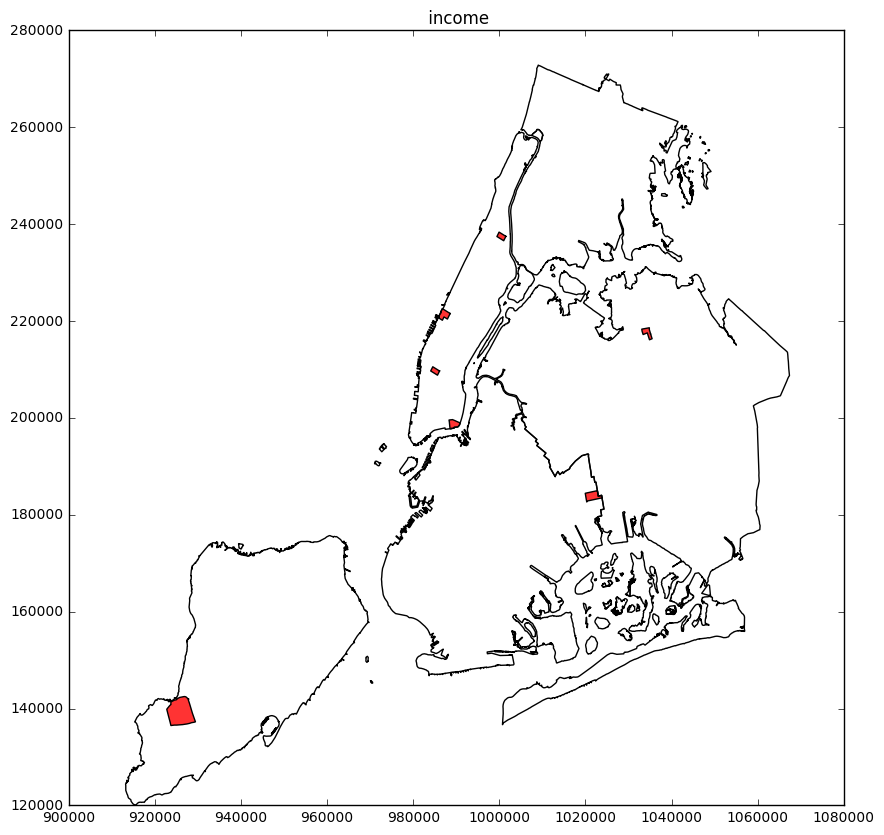

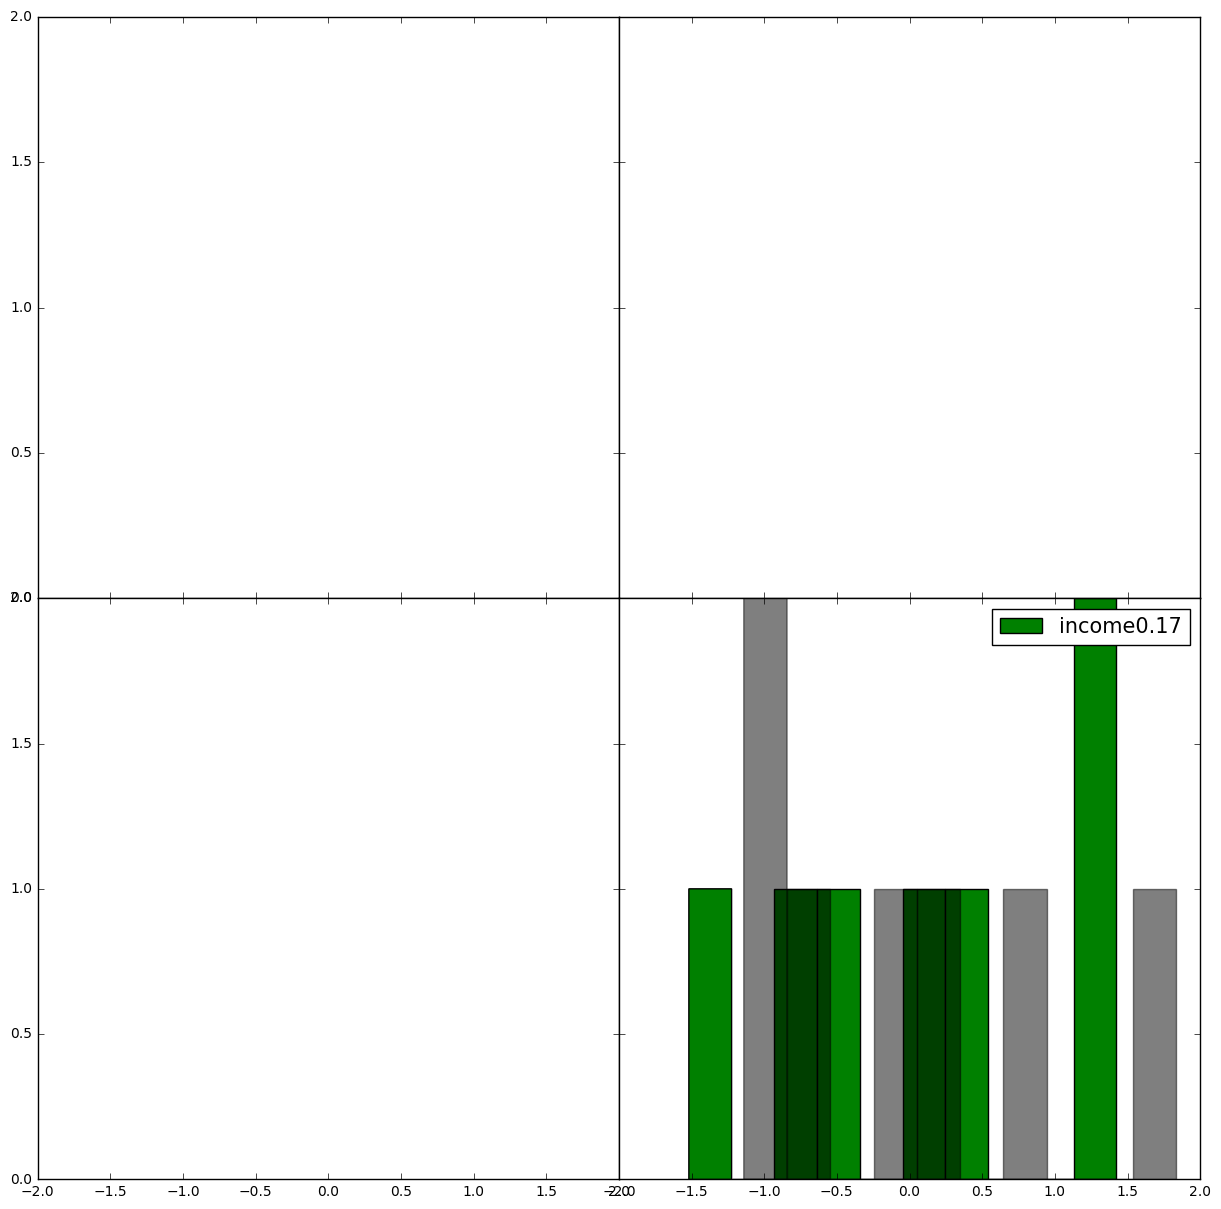

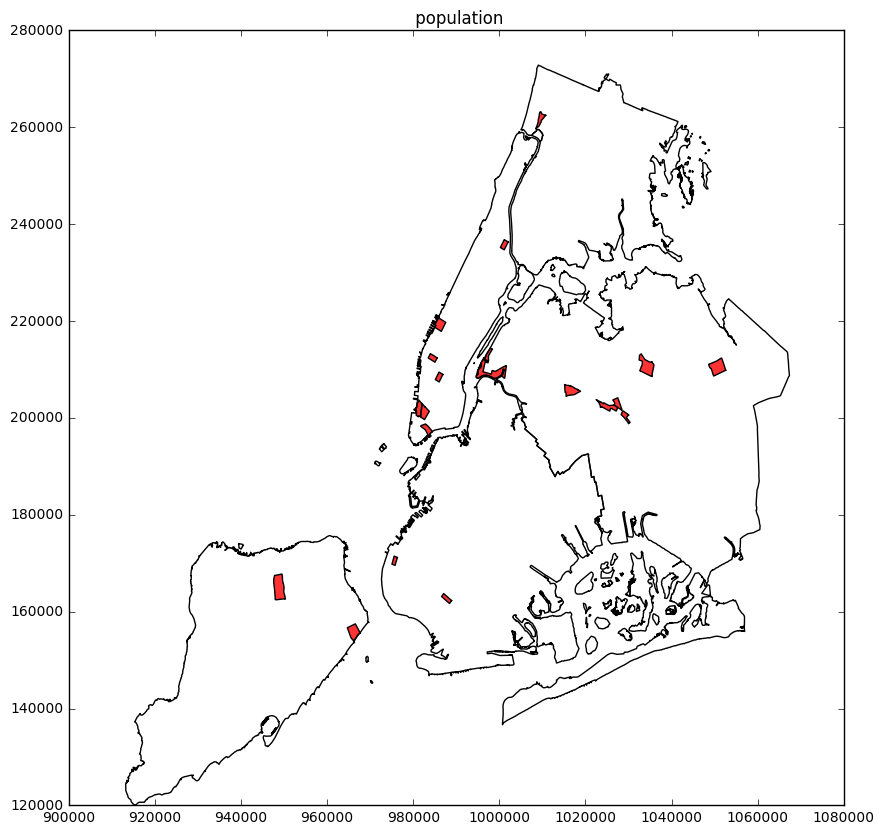

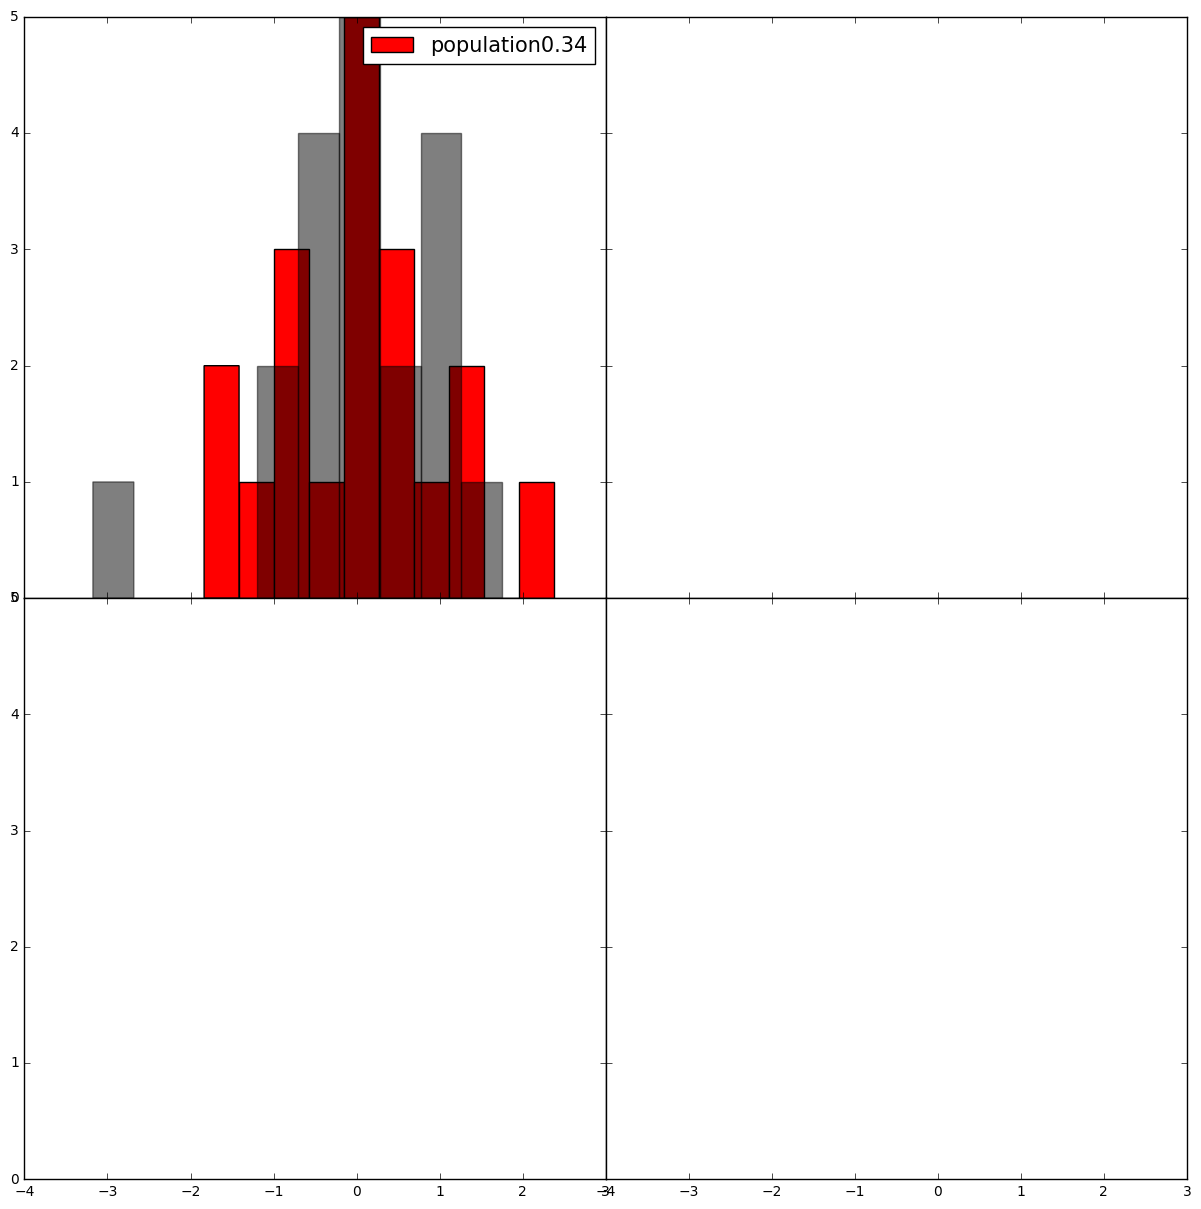

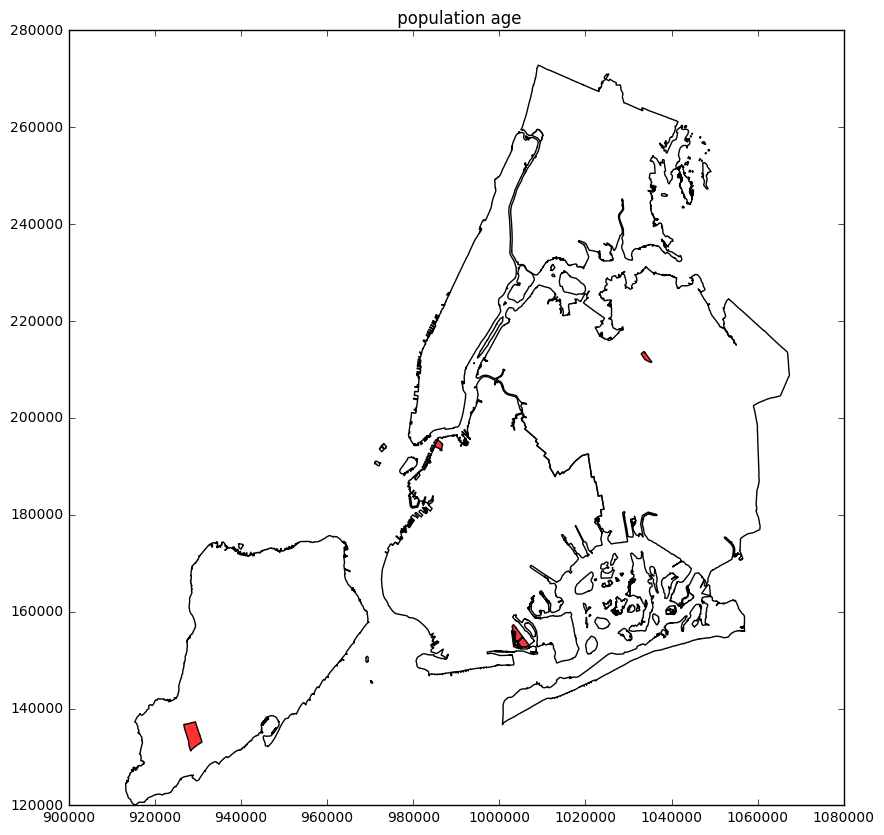

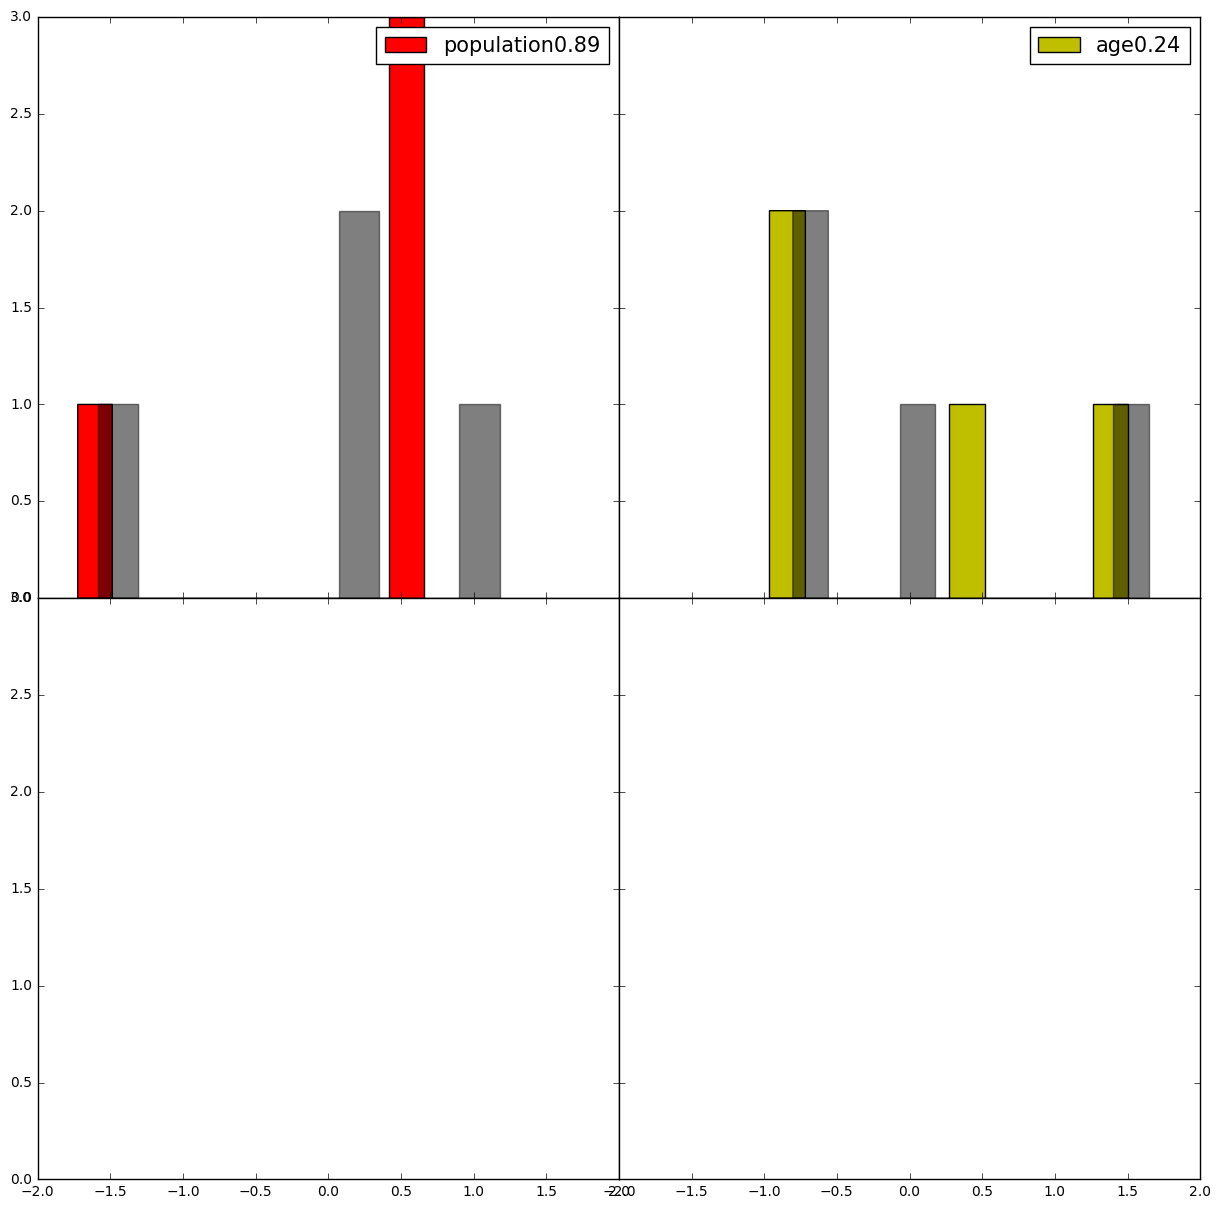

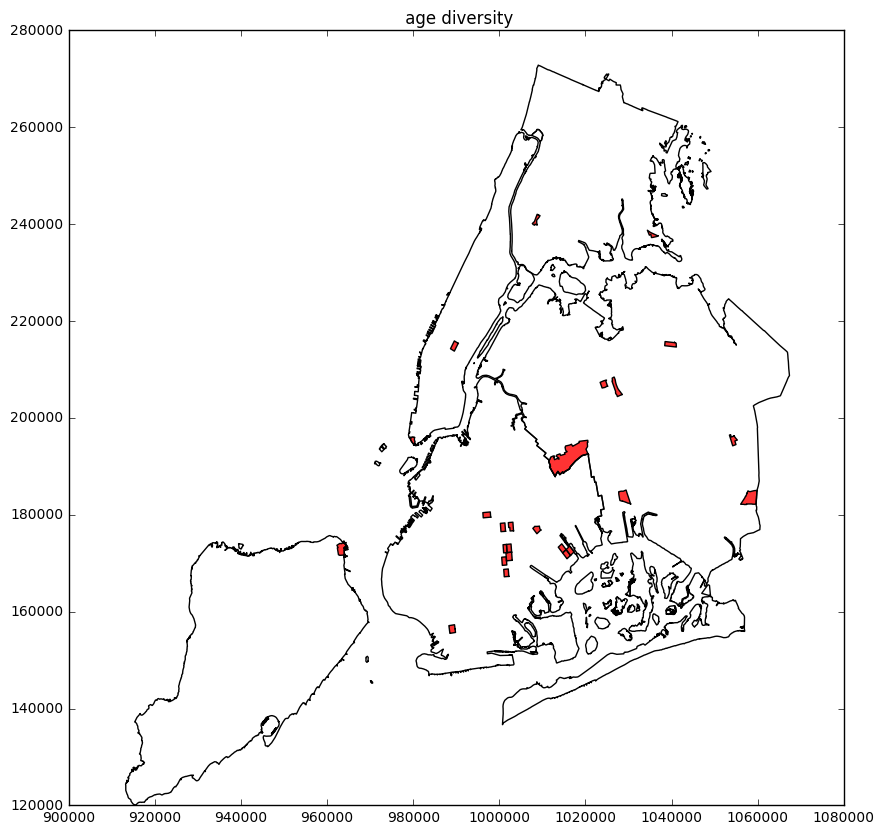

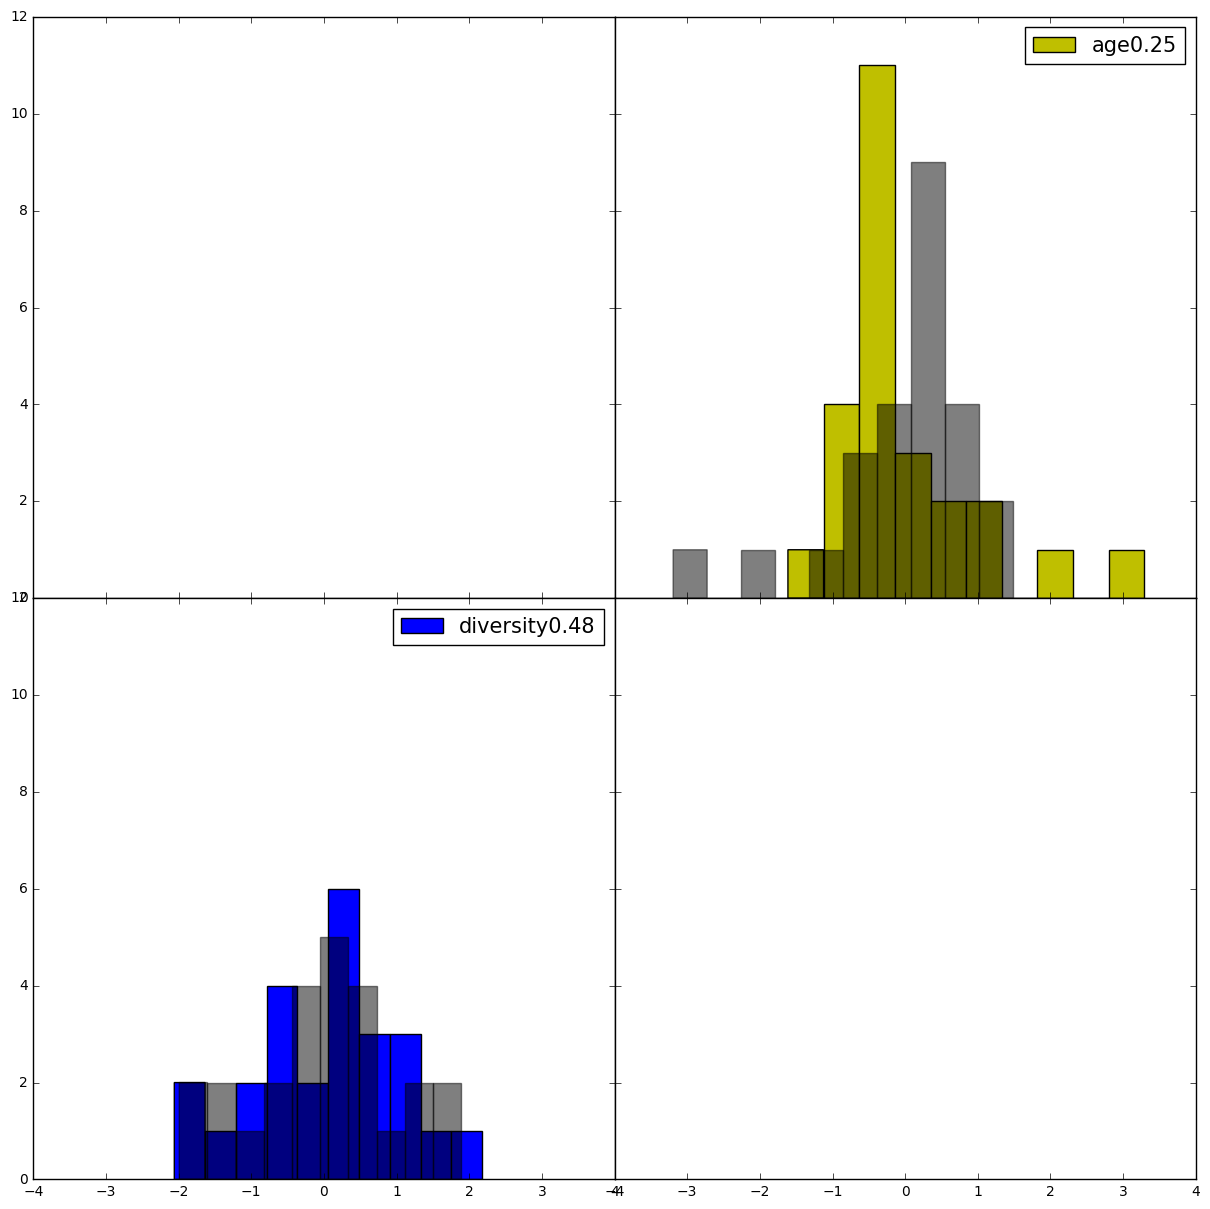

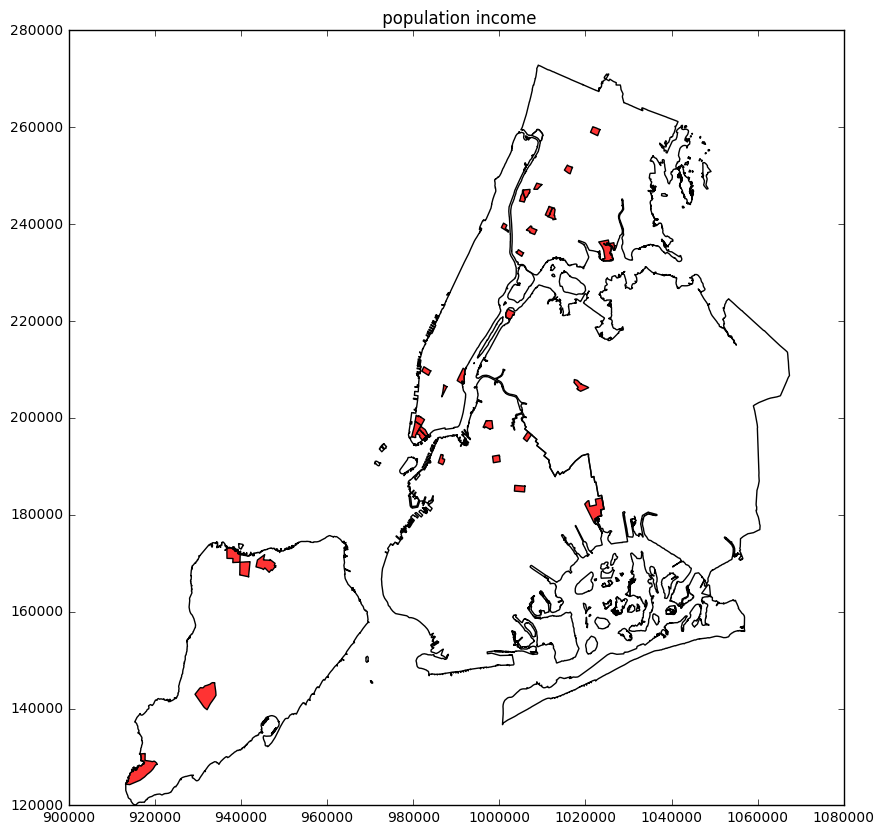

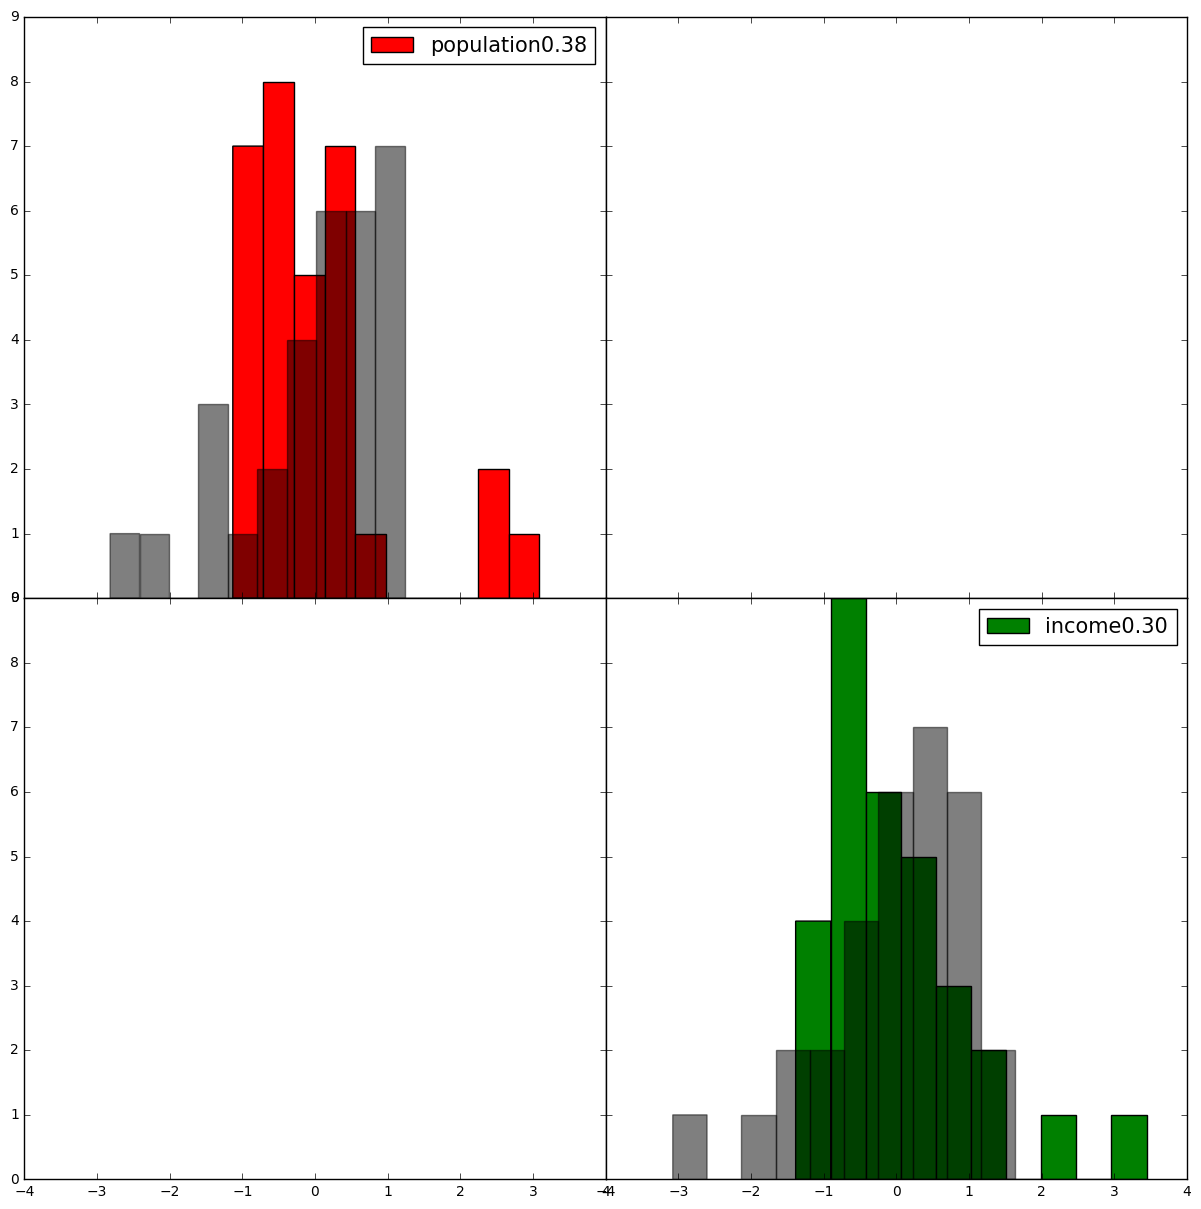

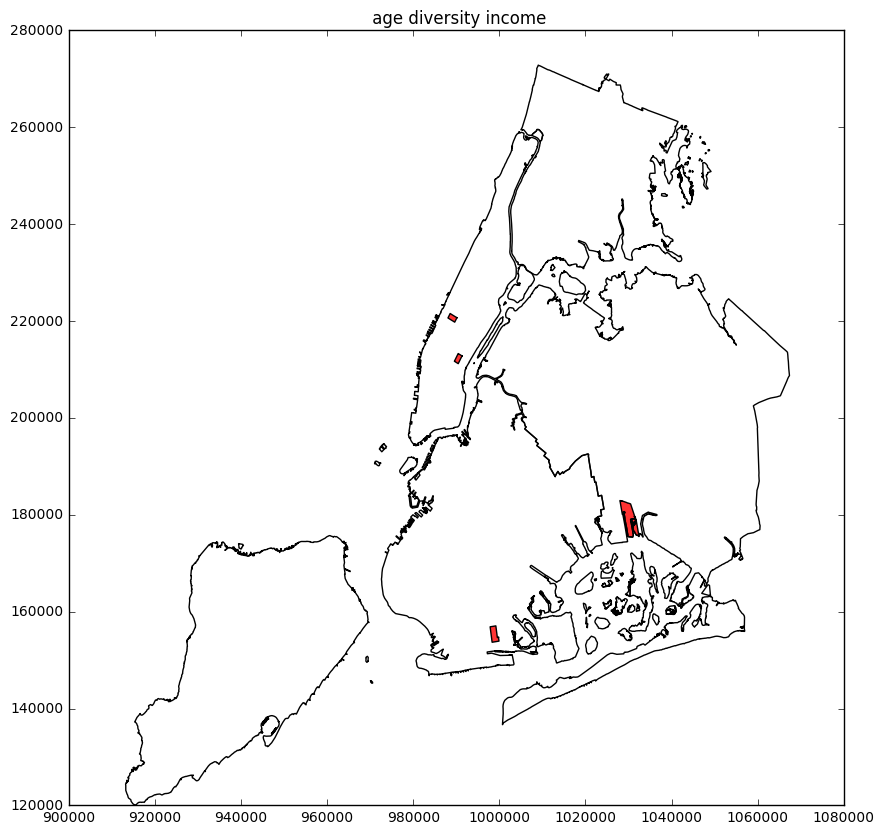

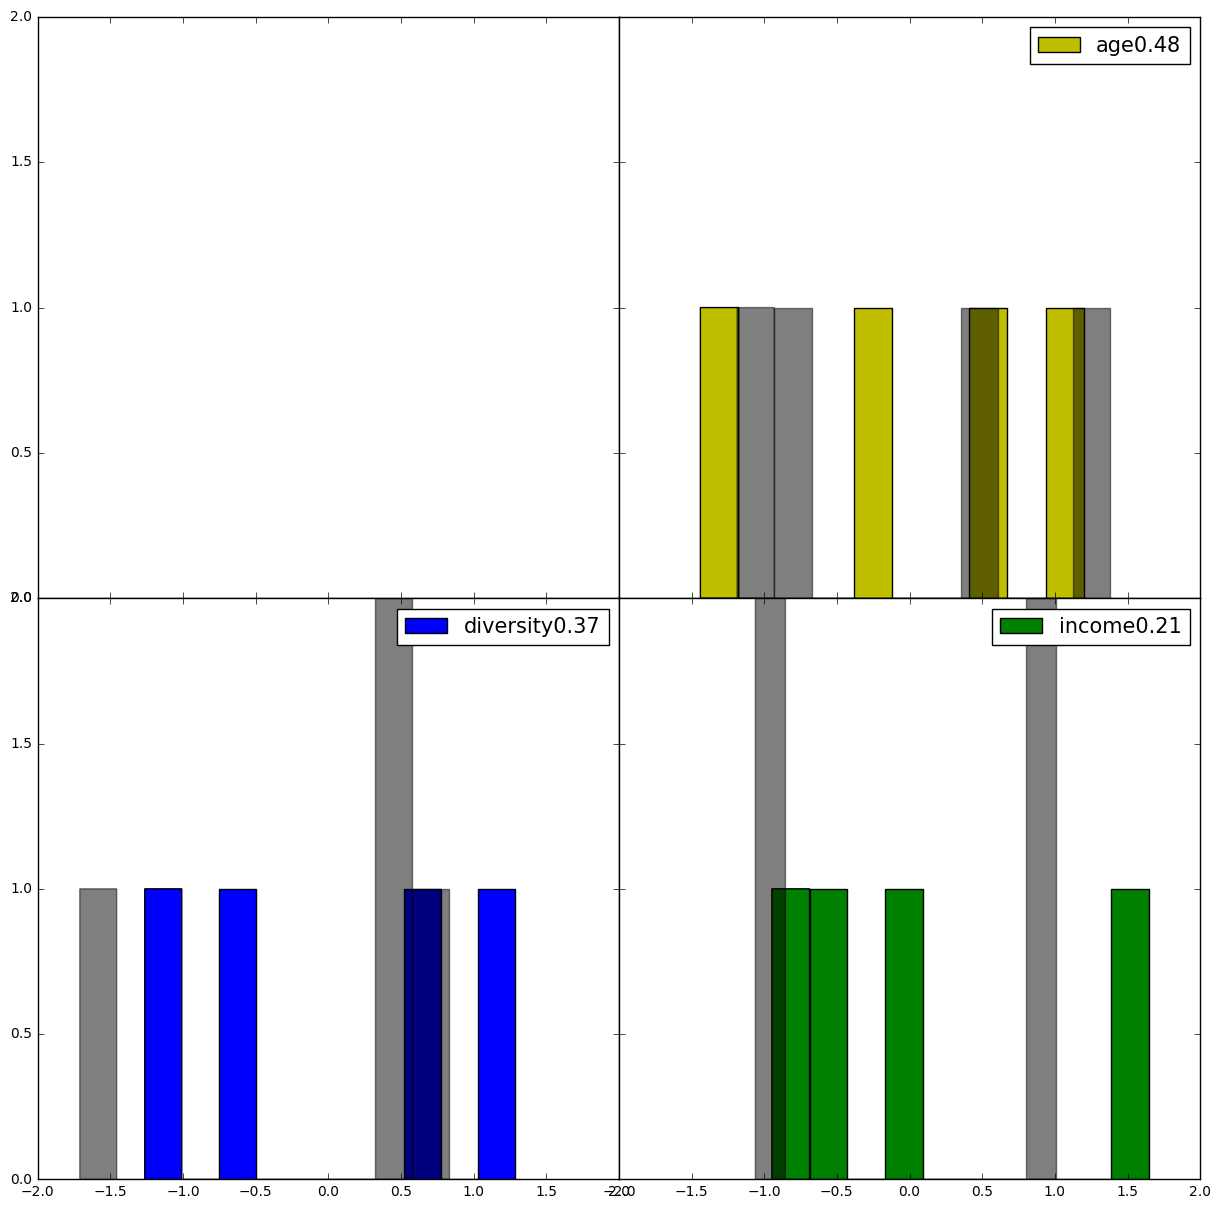

In [163]:
def getdifference(df, lab1, lab2, features = allFeatures, thr=0.05):
    n2 = int(len(features) / 2) 
    if len(features) % 2 > 0 :
        n2 = n2+2
    xyfeatures = [f+'_x' for f in features] + [f+'_y' for f in features]

    indx  = ((df['cluster_y'] == lab1).values &
        (df['cluster_x'] == lab2).values)
    if (sum(indx) == 0):
        return 0
    try:
        valsselect10 = skl.preprocessing.scale(df[indx][xyfeatures].\
                                               dropna().values[:,:len(features)])
        valsselect00 = skl.preprocessing.scale(df[indx][xyfeatures].\
                                               dropna().values[:,len(features):])
    except ValueError:
        return 1
    plotted = 0
    title = ''
    changed = []
    rhos = np.zeros(len(features))
    for i in range(len(features)):
        parsp = sp.stats.pearsonr(valsselect00[:,i], valsselect10[:,i])
        if parsp[1] > thr:
            print (indices[i], lab1, lab2, "rho: %.2f"%parsp[0], 
                   "(p-value = %.2f"%parsp[1], ")" )
            plotted=1
            title = title + ' ' + indices[i]
            changed.append(i)
            rhos[i] = parsp[1]
    if plotted:
        ax = pl.figure(figsize=(10,10)).add_subplot(111)
        
        ax = boroughs.plot(color='w', alpha = 0.8, axes=ax)    
        ax = df[indx].plot(color='red', alpha = 0.8, axes=ax)
            
        ax.set_title(title)
                
        f, ax = plt.subplots(2, n2, figsize=(15,15), sharex=True, sharey=True)
        ax = [ax[0][0],ax[0][1],ax[1][0],ax[1][1]]
        for c in changed:
            ax[c].hist(valsselect00[:,c], color=colors[c], 
                           label=indices[c]+"%.2f"%rhos[c])
            ax[c].hist(valsselect10[:,c], color= 'k', alpha=0.5)
            ax[c].legend(fontsize=15)   
            f.subplots_adjust(hspace=0)
            f.subplots_adjust(wspace=0)

 
                
for i in range(4):
    for j in range(i+1,4):
        getdifference(mergedclusters, i, j, allFeatures)
        print ("")
for i in range(3,-1,-1):
    for j in range(i-1,-1,-1):
        getdifference(mergedclusters, i, j, allFeatures)
        print ("")

In [165]:
zipvals10 = skl.preprocessing.scale(zipgeo10[allFeatureszip].dropna().values)
zipvals00 = skl.preprocessing.scale(zipgeo00[allFeatureszip].dropna().values)
nc = 5

kmzip10 = skl.cluster.KMeans(n_clusters=nc)


kmzip10.fit(zipvals10)

zipclustersdf10 = gpd.GeoDataFrame()
zipclustersdf10 = zipgeo10[['ZIPCODE','geometry'] + allFeatureszip].dropna()
zipclustersdf10['cluster'] = kmzip10.labels_

kmzip00 = skl.cluster.KMeans(n_clusters=nc, init=kmzip10.cluster_centers_)


kmzip00.fit(zipvals00)

zipclustersdf00 = gpd.GeoDataFrame()
zipclustersdf00 = zipgeo00[['ZIPCODE','geometry'] + allFeatureszip].dropna()
zipclustersdf00['cluster'] = kmzip00.labels_

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:821: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  n_jobs=self.n_jobs)


In [166]:
zipclustersdf10

ZIPCODE                                           geometry    population  \
0      11436  POLYGON ((1038098.251871482 188138.3800067157,...   1993.300000   
1      11213  POLYGON ((1001613.712964058 186926.4395172149,...   3762.705882   
2      11212  POLYGON ((1011174.275535807 183696.33770971, 1...   4264.315789   
3      11225  POLYGON ((995908.3654508889 183617.6128015518,...   4179.071429   
4      11218  POLYGON ((991997.1134308875 176307.4958601296,...   3979.058824   
5      11226  POLYGON ((994821.4729396403 177865.7178093046,...   4815.500000   
6      11219  POLYGON ((987286.3515269756 173946.4621963799,...   4178.571429   
7      11210  POLYGON ((995796.0097044706 171110.0666224658,...   2769.440000   
8      11230  POLYGON ((994099.2959063053 171240.7064530551,...   3012.400000   
9      11204  POLYGON ((989500.1699339747 170730.1687602103,...   3464.000000   
10     10471  POLYGON ((1016890.088579223 269622.9437433034,...   2789.900000   
11     10470  POLYGON ((1018000.867525637 269218.6804442108,...   2649.833333   
12     10466  POLYGON ((1027197.215602726 268941.3607888818,...   3544.722222   
13     10467  POLYGON ((1017396.305742651 265444.4701448828,...   4410.500000   
14     10463  POLYGON ((1006191.4413414 262532.3198012114, 1...   4148.307692   
15     10463  POLYGON ((1007634.817063555 258290.334846884, ...   8463.000000   
16     10475  POLYGON ((1032020.225313649 263914.7786504626,...  11662.000000   
17     10464  POLYGON ((1035294.156757891 263362.0300840437,...     39.000000   
20     10469  POLYGON ((1024100.416350141 261325.2041052133,...   3029.761905   
21     10468  POLYGON ((1015493.785269484 260806.2185946256,...   4815.647059   
22     10458  POLYGON ((1016105.938572735 259343.7165983766,...   5111.687500   
23     10034  POLYGON ((1006203.169008225 257345.6566181332,...   5492.000000   
24     10033  POLYGON ((1003020.86467731 256049.1618358046, ...   6205.777778   
25     10462  POLYGON ((1020069.122247398 251522.9376205504,...   3764.850000   
26     10040  POLYGON ((1002564.135275811 253724.7731118798,...   6520.500000   
27     10453  POLYGON ((1011926.555855393 251674.4530655444,...   4348.764706   
28     10465  POLYGON ((1028758.870287806 243777.018401131, ...   2595.466667   
29     10461  POLYGON ((1029230.779448971 251468.9475710541,...   3121.750000   
30     10457  POLYGON ((1011926.555855393 251674.4530655444,...   3250.150000   
31     10460  POLYGON ((1018310.718611971 250944.4801160544,...   4059.133333   
..       ...                                                ...           ...   
170    11423  POLYGON ((1047964.521508977 205966.9598350525,...   2875.666667   
171    11428  POLYGON ((1058328.643497229 205085.9658621252,...   2324.285714   
172    11432  POLYGON ((1037183.602782145 201617.3205684721,...   3217.473684   
173    11379  POLYGON ((1019755.134358317 204116.3142581284,...   1965.166667   
174    11429  POLYGON ((1059514.14276664 201987.3906944692, ...   3090.000000   
175    11435  POLYGON ((1032469.175859317 199963.2661338001,...   3642.533333   
176    11415  POLYGON ((1032469.175859317 199963.2661338001,...   2967.333333   
177    11418  POLYGON ((1029400.592101485 197246.1842976362,...   2744.642857   
178    11433  POLYGON ((1045331.84468773 197513.7421614677, ...   2669.461538   
180    11221  POLYGON ((1001383.64485465 188443.122179389, 1...   3615.263158   
181    11421  POLYGON ((1026065.502643064 193710.0053463876,...   2952.461538   
182    11419  POLYGON ((1029301.697942317 191200.7022941262,...   3034.176471   
183    11434  POLYGON ((1048057.740154564 193045.403329134, ...   3361.647059   
184    11216  POLYGON ((999324.3264667243 191407.4522087127,...   3576.285714   
185    11416  POLYGON ((1027428.763039902 190497.3683989644,...   2415.800000   
186    11233  POLYGON ((1001383.64485465 188443.122179389, 1...   3557.000000   
188    10019  POLYGON ((986161.7127001435 220802.6076571345,...   5086.222222   
194    10022  POLYGON ((991852.97329

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


(900000.0, 1080000.0, 120000.0, 280000.0)

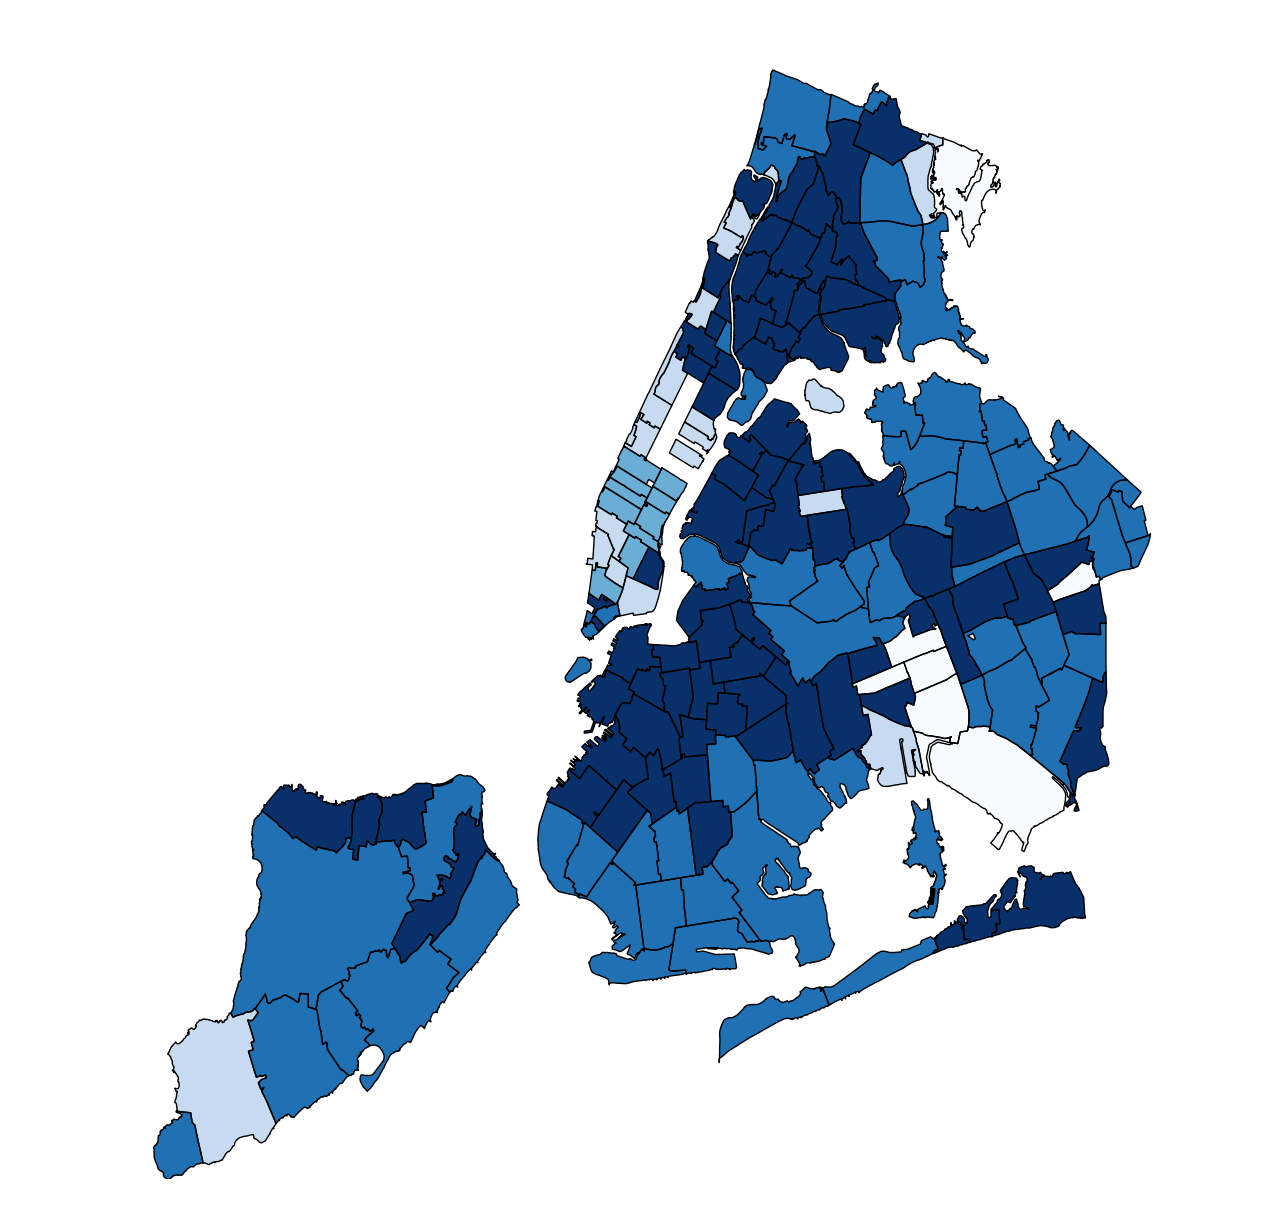

In [167]:
ax = pl.figure(figsize=(15,15)).add_subplot(111)
zipclustersdf00.plot(column='cluster', colormap='Blues', alpha = 1, axes=ax)
ax.axis('off')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


(900000.0, 1080000.0, 120000.0, 280000.0)

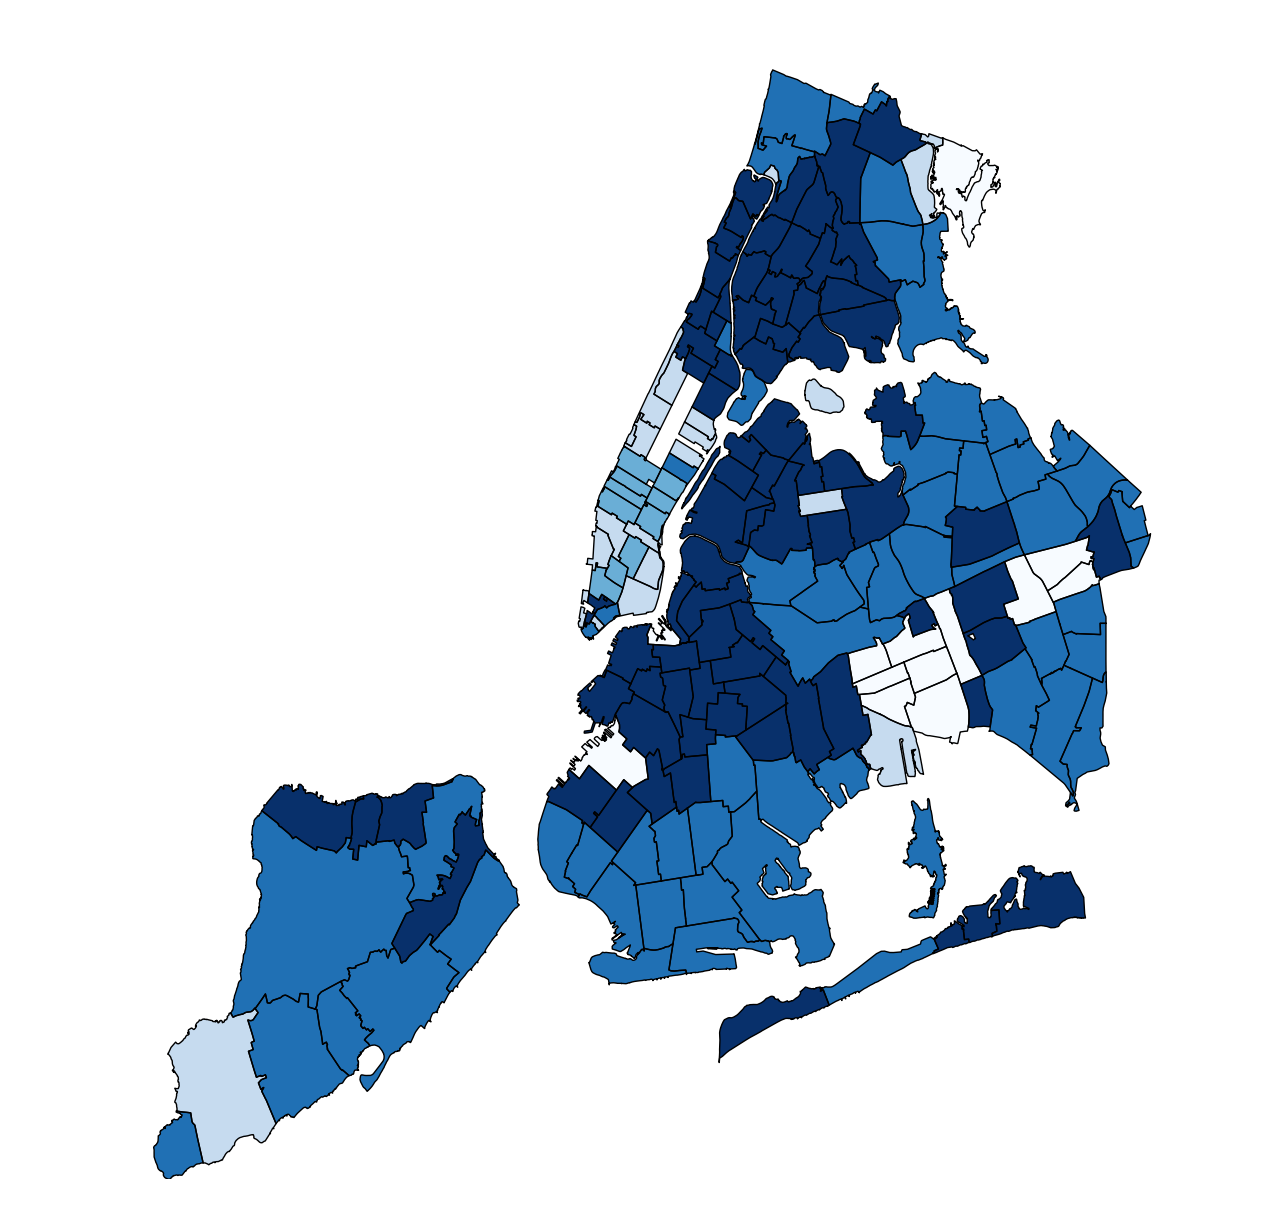

In [168]:
ax = pl.figure(figsize=(15,15)).add_subplot(111)
zipclustersdf10.plot(column='cluster', colormap='Blues', alpha = 1, axes=ax)
ax.axis('off')

In [171]:
zipmergedclusters = pd.merge(zipclustersdf00, zipclustersdf10, on="ZIPCODE")
zipmergedclusters['changes'] = zipmergedclusters['cluster_x'] - zipmergedclusters['cluster_y']
zipmergedclusters[['cluster_x', 'cluster_y']]
zipmergedclusters['geometry'] = zipmergedclusters['geometry_x']

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


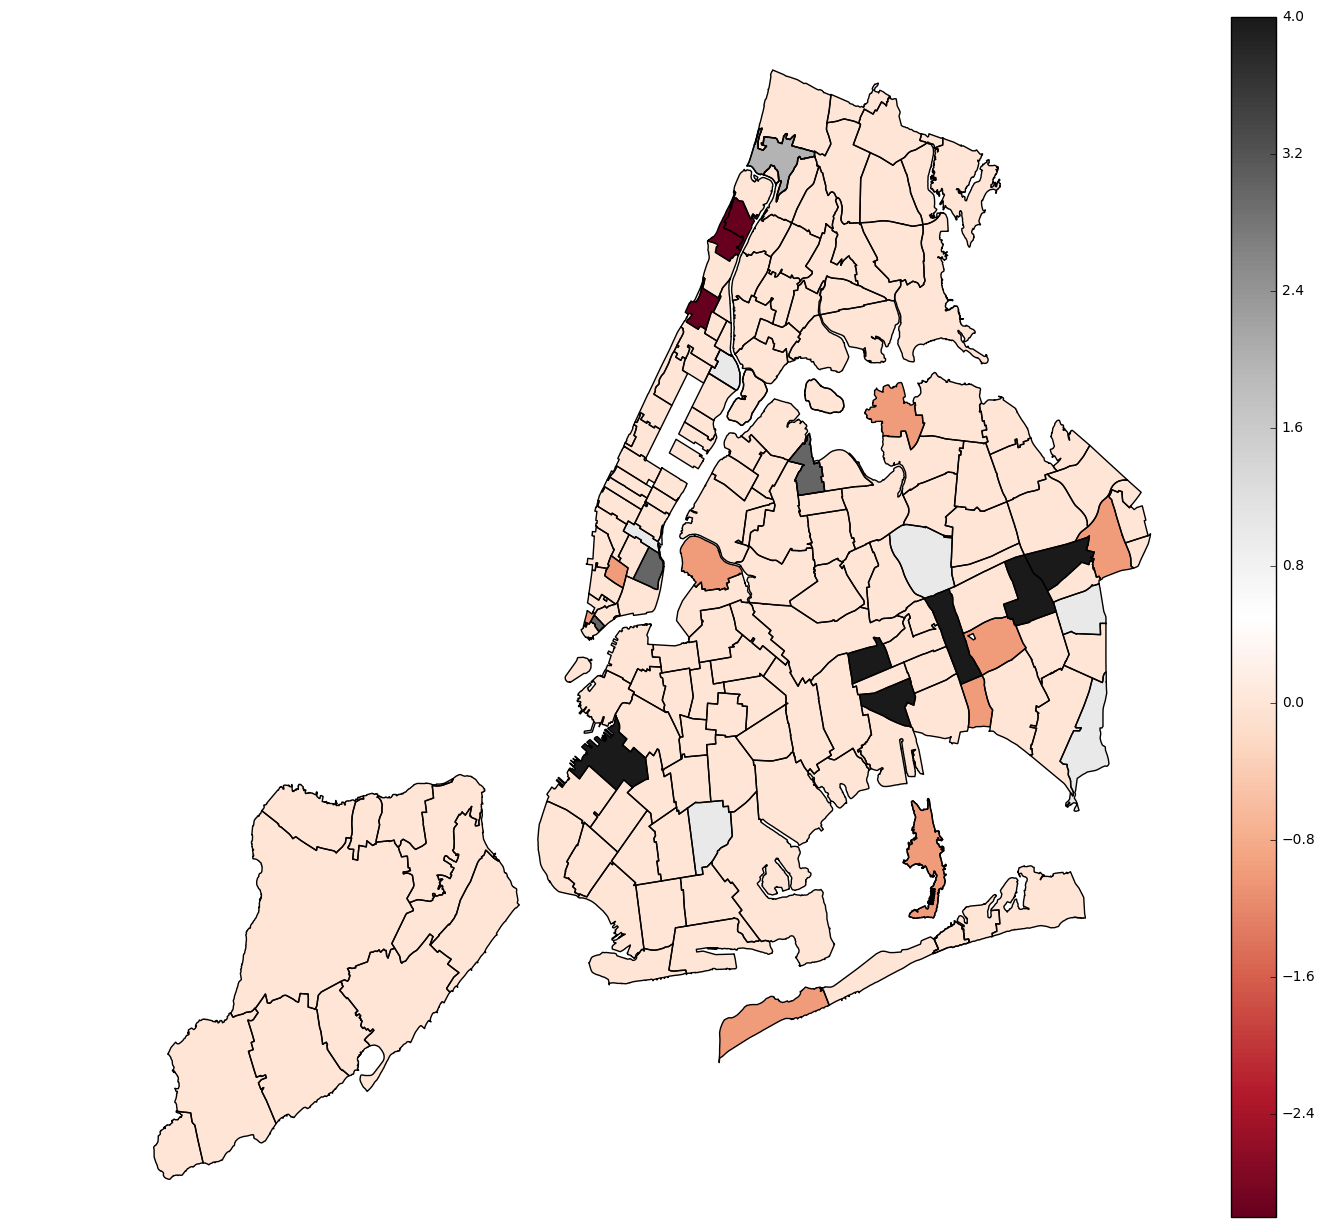

In [172]:
ax = pl.figure(figsize=(15,15)).add_subplot(111)
ax = zipmergedclusters.plot(column='changes', colormap='RdGy',alpha = 1, axes=ax)
vmin, vmax = min(zipmergedclusters['changes'].values), \
                max(zipmergedclusters['changes'].values)
ax.axis('off')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='RdGy', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)


In [173]:
zipmergedclusters

ZIPCODE                                         geometry_x  population_x  \
0      11436  POLYGON ((1038098.251871482 188138.3800067157,...   2061.700000   
1      11213  POLYGON ((1001613.712964058 186926.4395172149,...   3965.812500   
2      11212  POLYGON ((1011174.275535807 183696.33770971, 1...   4426.388889   
3      11225  POLYGON ((995908.3654508889 183617.6128015518,...   4474.454545   
4      11218  POLYGON ((991997.1134308875 176307.4958601296,...   4126.066667   
5      11226  POLYGON ((994821.4729396403 177865.7178093046,...   5219.571429   
6      11219  POLYGON ((987286.3515269756 173946.4621963799,...   3891.190476   
7      11210  POLYGON ((995796.0097044706 171110.0666224658,...   2937.480000   
8      11230  POLYGON ((994099.2959063053 171240.7064530551,...   3059.739130   
9      11204  POLYGON ((989500.1699339747 170730.1687602103,...   3297.875000   
10     10471  POLYGON ((1016890.088579223 269622.9437433034,...   2283.333333   
11     10470  POLYGON ((1018000.867525637 269218.6804442108,...   2743.833333   
12     10466  POLYGON ((1027197.215602726 268941.3607888818,...   3562.812500   
13     10467  POLYGON ((1017396.305742651 265444.4701448828,...   4312.550000   
14     10463  POLYGON ((1006191.4413414 262532.3198012114, 1...   4143.545455   
15     10463  POLYGON ((1006191.4413414 262532.3198012114, 1...   4143.545455   
16     10463  POLYGON ((1007634.817063555 258290.334846884, ...   7820.000000   
17     10463  POLYGON ((1007634.817063555 258290.334846884, ...   7820.000000   
18     10475  POLYGON ((1032020.225313649 263914.7786504626,...  13558.666667   
19     10464  POLYGON ((1035294.156757891 263362.0300840437,...      5.000000   
20     10469  POLYGON ((1024100.416350141 261325.2041052133,...   2749.555556   
21     10468  POLYGON ((1015493.785269484 260806.2185946256,...   4817.583333   
22     10458  POLYGON ((1016105.938572735 259343.7165983766,...   4871.250000   
23     10034  POLYGON ((1006203.169008225 257345.6566181332,...   6214.500000   
24     10033  POLYGON ((1003020.86467731 256049.1618358046, ...   6739.777778   
25     10462  POLYGON ((1020069.122247398 251522.9376205504,...   3071.615385   
26     10040  POLYGON ((1002564.135275811 253724.7731118798,...   7287.166667   
27     10453  POLYGON ((1011926.555855393 251674.4530655444,...   4273.300000   
28     10465  POLYGON ((1028758.870287806 243777.018401131, ...   2329.083333   
29     10461  POLYGON ((1029230.779448971 251468.9475710541,...   3029.466667   
..       ...                                                ...           ...   
158    11427  POLYGON ((1058755.729585305 206326.356097877, ...   3290.428571   
159    11374  POLYGON ((1021799.012816474 206747.5990217924,...   3839.285714   
160    11366  POLYGON ((1047964.521508977 205966.9598350525,...   3140.000000   
161    11423  POLYGON ((1047964.521508977 205966.9598350525,...   3024.777778   
162    11428  POLYGON ((1058328.643497229 205085.9658621252,...   2553.714286   
163    11432  POLYGON ((1037183.602782145 201617.3205684721,...   2970.888889   
164    11379  POLYGON ((1019755.134358317 204116.3142581284,...   2250.416667   
165    11429  POLYGON ((1059514.14276664 201987.3906944692, ...   3496.166667   
166    11435  POLYGON ((1032469.175859317 199963.2661338001,...   3630.857143   
167    11415  POLYGON ((1032469.175859317 199963.2661338001,...   3374.500000   
168    11418  POLYGON ((1029400.592101485 197246.1842976362,...   2766.285714   
169    11433  POLYGON ((1045331.84468773 197513.7421614677, ...   1854.200000   
170    11221  POLYGON ((1001383.64485465 188443.122179389, 1...   3425.684211   
171    11421  POLYGON ((1026065.502643064 193710.0053463876,...   2847.461538   
172    11419  POLYGON ((1029301.697942317 191200.7022941262,...   2980.933333   
173    11434  POLYGON ((1048057.740154564 193045.403329134, ...   3111.066667   
174    11216  POLYGON ((999324.3264667243 191407.4522087127,...   3704.785714   
175    11416  POLYGON ((1027428.7630

In [175]:

             
for i in range(4):
    for j in range(i+1,4):
        getdifference(zipmergedclusters, i, j, allFeatureszip)
        print ("")
for i in range(3,-1,-1):
    for j in range(i-1,-1,-1):
        getdifference(zipmergedclusters, i, j, allFeatureszip)
        print ("")


In [177]:
from sklearn.cluster import DBSCAN
import geopy
from geopy.distance import great_circle
# alreay done the two lines below. just a reminder here
#coordinates = df.as_matrix(columns=['lon', 'lat'])
#wc = whiten(coordinates)
dbsc = DBSCAN(eps=0.8, min_samples=2)
db00 = dbsc.fit(zipvals00)
labels00 = (db00.labels_).astype(int)
num_clusters = len(set(labels00)) - (1 if -1 in labels00 else 0)

clusters00 = pd.Series([zipvals00[labels00 == i] for i in range(num_clusters)])
print('Number of clusters: %d' % num_clusters)

db10 = DBSCAN(eps=0.8, min_samples=2).fit(zipvals10)
labels10 = (db10.labels_).astype(int)
num_clusters = len(set(labels10)) - (1 if -1 in labels10 else 0)

clusters10 = pd.Series([zipvals10[labels10 == i] for i in range(num_clusters)])
print('Number of clusters: %d' % num_clusters)


Number of clusters: 7
Number of clusters: 6


In [178]:
db00.labels_.shape, zipvals00.shape

((181,), (181, 5))

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:229: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


(900000.0, 1080000.0, 120000.0, 280000.0)

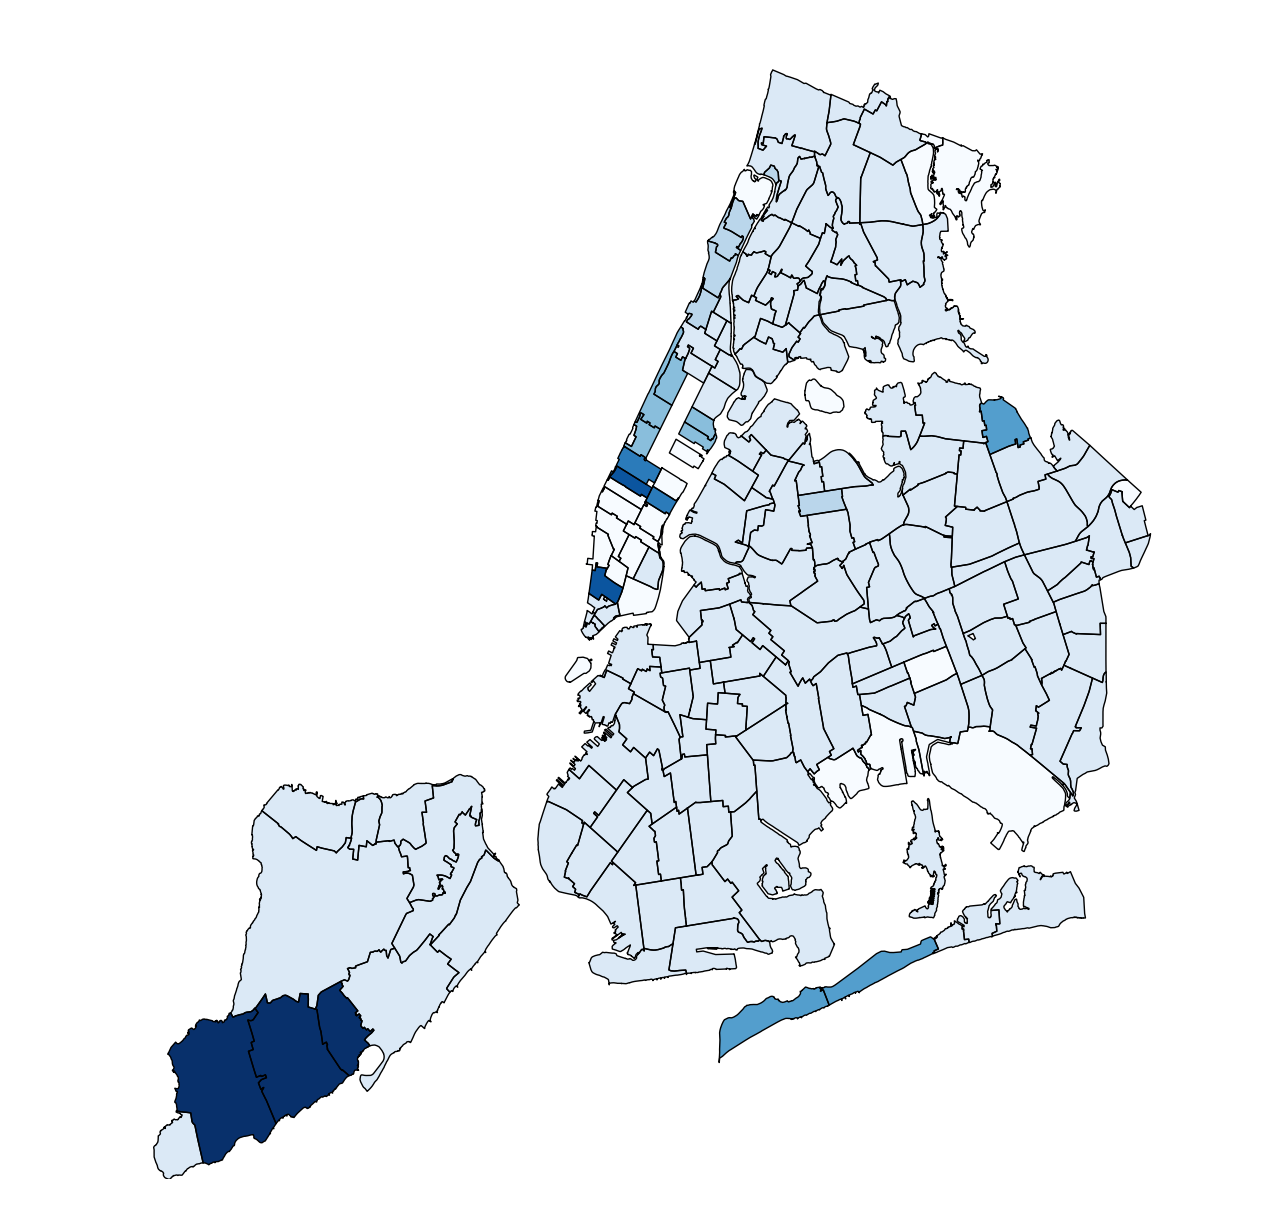

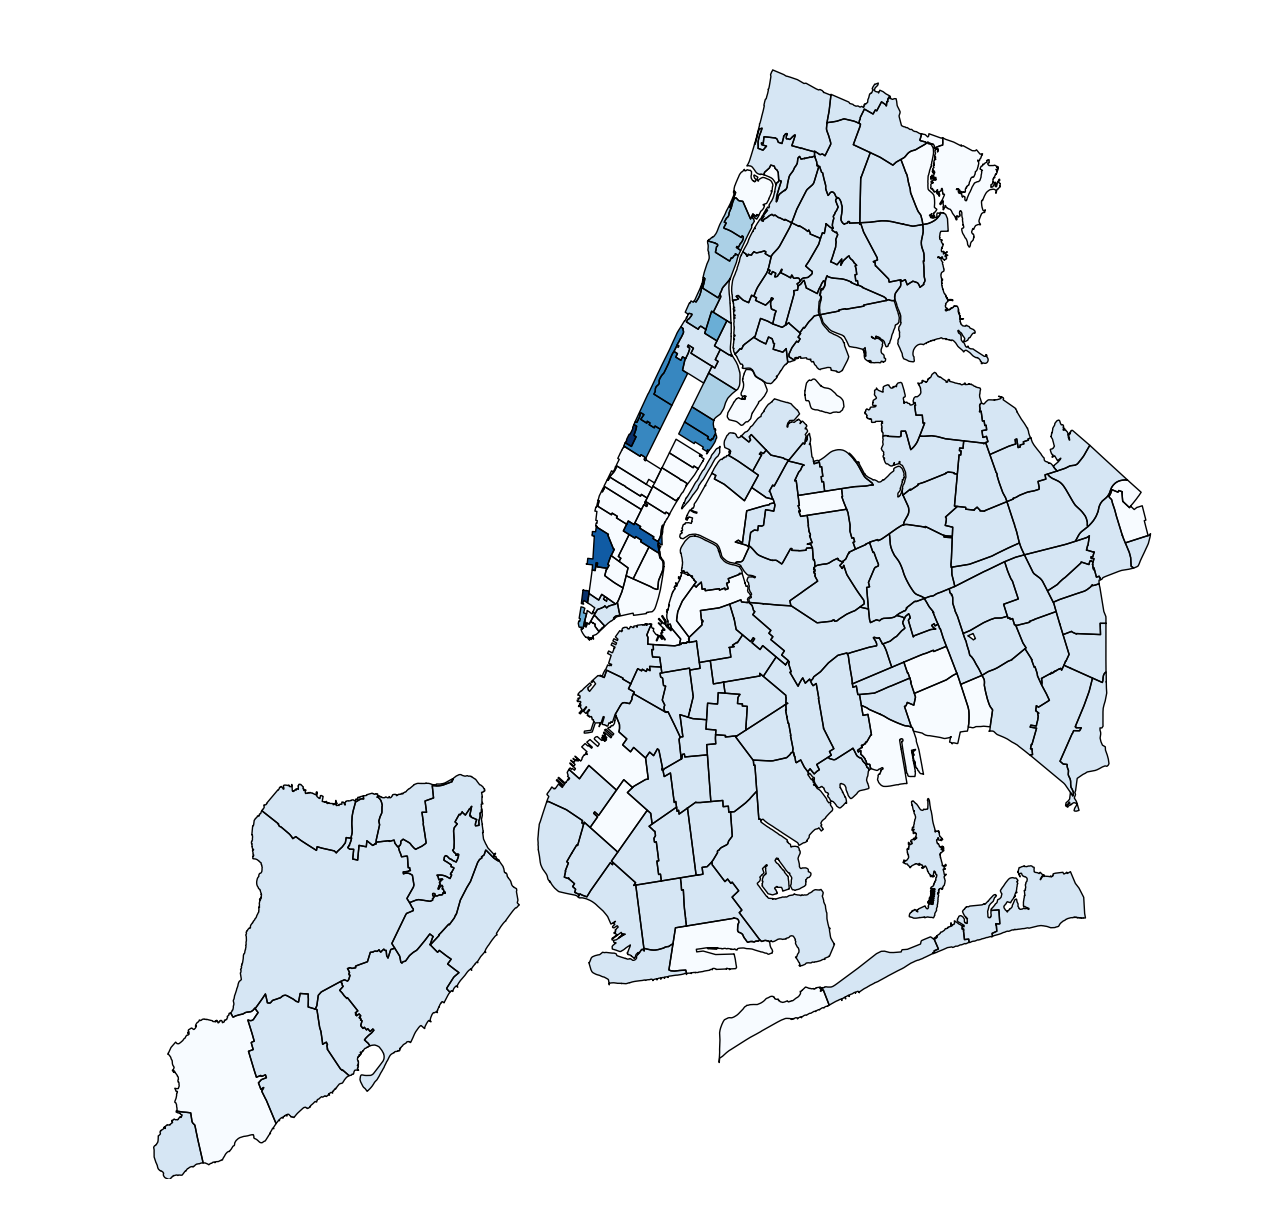

In [180]:
zipclustersdf00 = zipgeo00[['ZIPCODE','geometry'] + allFeatureszip].dropna()
zipclustersdf00['cluster'] = kmzip00.labels_
zipclustersdf00['cluster'] = (db00.labels_).astype(int)
ax = pl.figure(figsize=(15,15)).add_subplot(111)
zipclustersdf00.plot(column='cluster', colormap='Blues', alpha = 1, axes=ax)
ax.axis('off')

zipclustersdf10 = zipgeo10[['ZIPCODE','geometry'] + allFeatureszip].dropna()
zipclustersdf10['cluster'] = kmzip10.labels_
zipclustersdf10['cluster'] = (db10.labels_).astype(int)
ax = pl.figure(figsize=(15,15)).add_subplot(111)
zipclustersdf10.plot(column='cluster', colormap='Blues', alpha = 1, axes=ax)
ax.axis('off')

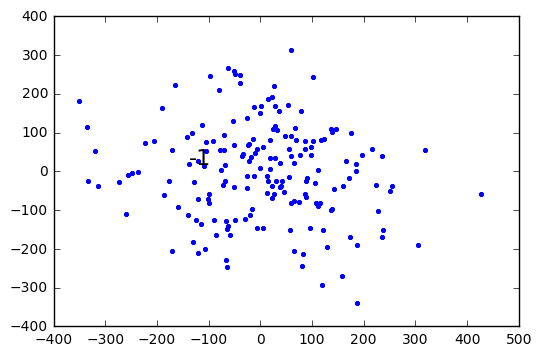

In [183]:
from sklearn import manifold
model = manifold.TSNE(n_components=6, perplexity=10.0)

tsne_result = model.fit_transform(zipvals00) 
pl.plot(tsne_result[:,0], tsne_result[:,1], ".")

dbscan_tsne = dbsc.fit_predict(tsne_result)

color=cm.brg(np.linspace(0,1,np.max(dbscan_tsne) - np.min(dbscan_tsne)+1))
for i in range(np.min(dbscan_tsne), np.max(dbscan_tsne)+1):
    plt.plot(tsne_result[dbscan_tsne == i][:,0],
             tsne_result[dbscan_tsne == i][:,1],
             ".",
             color=color[i+1]
             )
    plt.text(tsne_result[dbscan_tsne == i][:,0][0],
             tsne_result[dbscan_tsne == i][:,1][0],
             str(i), color="black", size=16
             )